# NLP

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version은 코랩 명령입니다.
    %tensorflow_version 2.x
except Exception:
    pass

# 이 노트북은 텐서플로 ≥2.4이 필요합니다
# 2.x 버전은 대부분 동일한 결과를 만들지만 몇 가지 버그가 있습니다.
import tensorflow as tf
from tensorflow import keras

# 공통 모듈 임포트
import numpy as np
import pandas as pd

import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "NLP"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action='ignore')

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
No GPU was detected. CNNs can be very slow without a GPU.
Go to Runtime > Change runtime and select a GPU hardware accelerator.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 한글 형태소 분석

### 형태소 분석기 설치

In [ ]:
#Mac에서는 터미널에서 아래 명령어 실행 - jdk 를 먼저 설치 해야 함

'''
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

pip install --upgrade pip
pip install JPype1
pip install konlpy
'''

'\nbash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)\n\npip install --upgrade pip\npip install JPype1\npip install konlpy\n'

In [ ]:
#Windows 에서는 Mecab 지원 안함
#jdk 를 설치 한 후 JAVA_HOME 환경변수에 jdk 경로를 설정하고 PATH 환경 변수에 jdk 경로의 bin을 설정
'''
pip install --upgrade pip
pip install JPype1-0.5.7-cp27-none-win_amd64.whl
pip install konlpy
'''

'\npip install --upgrade pip\npip install JPype1-0.5.7-cp27-none-win_amd64.whl\npip install konlpy\n'

### colab

In [ ]:
# JDK 와 konlpy, jpype 를 설치하고 환경 설정까지 한 후에
# macab 를 다운로드 받는 스크립트 파일의 위치

!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 9.49 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [ ]:
# 다운로드 받은 스크립트 파일의 위치로 이동

cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
# bash 를 사용해서 설치

!bash install_mecab-ko_on_colab_light_220429.sh

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

text = u"""이제 colab 에서 Mecab를 사용할 수 있게 되었습니다."""
my_morphs = mecab.morphs(text)
print(my_morphs)

['이제', 'colab', '에서', 'Mecab', '를', '사용', '할', '수', '있', '게', '되', '었', '습니다', '.']


## 자연어 전처리

### 토큰화

In [ ]:
# TensorFlow 의 토크나이저

from tensorflow.keras.preprocessing.text import Tokenizer
sentences = [
    '영실이는 나를 정말 정말 좋아해',
    '영실이는 영화를 좋아해'
]
# 객체 생성
tokenizer = Tokenizer()

# 아래 함수를 부르면 단어 단위로 분할해서 각 단어에 인덱스를 부여
tokenizer.fit_on_texts(sentences)

# 각 단어와 인덱스를 확인
print("단어 인덱스:",tokenizer.word_index)


단어 인덱스: {'영실이는': 1, '정말': 2, '좋아해': 3, '나를': 4, '영화를': 5}


In [ ]:
# 인코딩된 결과

# 문장을 각 단어의 인덱스를 사용해서 치환 - 임베딩(수치화)
word_encoding = tokenizer.texts_to_sequences(sentences)
word_encoding

[[1, 4, 2, 2, 3], [1, 5, 3]]

### OOV

In [ ]:
# 사전에 없는 단어가 있을 때 인코딩 결과 - 기본적으로는 무시

new_sentences = ['영실이는 경록이와 나를 좋아해']
new_word_encoding = tokenizer.texts_to_sequences(new_sentences)
new_word_encoding

[[1, 4, 3]]

In [ ]:
# 단어 사전을 만들 때 OOV 옵션을 설정 - 없는 단어를 OOV 로 처리함
# OOV 가 가장 빠른(앞의) 인덱스를 가짐
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

new_word_encoding = tokenizer.texts_to_sequences(new_sentences)

print(word_index)
print(new_word_encoding)

{'<OOV>': 1, '영실이는': 2, '정말': 3, '좋아해': 4, '나를': 5, '영화를': 6}
[[2, 1, 5, 4]]


### 빈도 수 문제

In [ ]:
# 앞의 2개 단어만 이용해서 단어를 찾음 - 3개 중 하나는 OOV
# num_words : 단어 사전에 있는 단어들 중 가장 앞의 3개만 사용한다는 의미
# 그 이외의 단어들은 전부 OOV 로 처리
tokenizer = Tokenizer(num_words=3, oov_token="<OOV>")

tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
new_word_encoding = tokenizer.texts_to_sequences(new_sentences)
print(word_index)
print(new_word_encoding)


{'<OOV>': 1, '영실이는': 2, '정말': 3, '좋아해': 4, '나를': 5, '영화를': 6}
[[2, 1, 1, 1]]


### 패딩

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 기본적으로 문장의 앞에 0을 붙여서 패딩
padded = pad_sequences(word_encoding)
print(padded)

[[1 4 2 2 3]
 [0 0 1 5 3]]


In [ ]:
# maxlen 을 사용해서 문장의 최대 길이 고정

# length 보다 길면 가장 앞이 짤리게 됨
padded = pad_sequences(word_encoding, padding='post',maxlen=4)

print(padded)

[[4 2 2 3]
 [1 5 3 0]]


In [ ]:
# 최대 길이보다 문장이 길 때 뒷부분 자르기

# truncating 옵션을 통해 문장의 뒤가 잘리도록 설정
padded = pad_sequences(word_encoding, padding='post', truncating='post', maxlen=4)
print(padded)

[[1 4 2 2]
 [1 5 3 0]]


### 한국어 전처리

#### 데이터 가져오기

In [ ]:
# Naver sentiment movie corpus 데이터 불러오기

train = pd.read_csv('/content/drive/MyDrive/ratings_train.txt', sep='\t', encoding='utf8')

#### 구조 확인

In [ ]:
print(train.shape)

(150000, 3)


##### 레이블별 개수

In [ ]:
# 0 또는 1 점수로 구성되어 있음
cnt = train['label'].value_counts()
print(cnt)

0    75173
1    74827
Name: label, dtype: int64


#### 레이블별 비율

<Axes: xlabel='label', ylabel='count'>

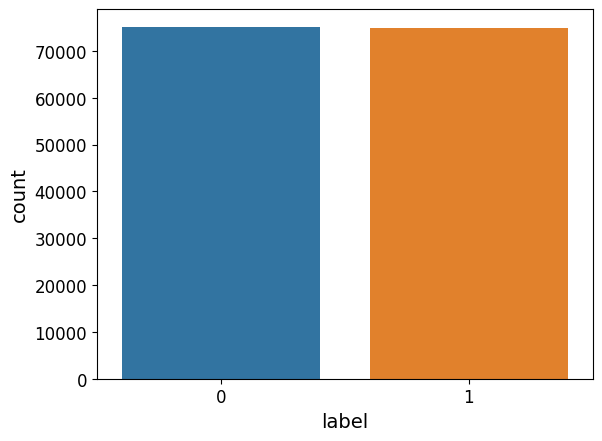

In [ ]:
import seaborn as sns

# countplot 을 사용해서 각 레이블 시각화
sns.countplot(x='label',data=train)

#### 결측치 확인


In [ ]:
# null 값 확인
train.isnull().sum()

id          0
document    5
label       0
dtype: int64

#### 결측치(의견없음)가 특정 label값만 있는지 확인



In [ ]:
train[train['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


#### 레이블 별 텍스트 길이

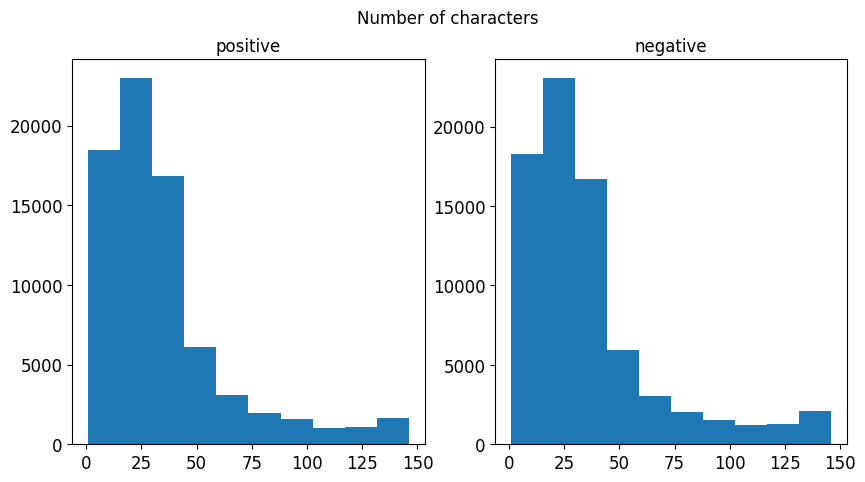

In [ ]:
# 각 레이블 별로 텍스트의 길이를 시각화해서 비교

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
data_len=train[train['label']==1]['document'].str.len()
ax1.hist(data_len)
ax1.set_title('positive')

data_len=train[train['label']==0]['document'].str.len()
ax2.hist(data_len)
ax2.set_title('negative')
fig.suptitle('Number of characters')
plt.show()


#### 한글 형태소 분석기 생성

In [ ]:
# Kkma, Komoran, Okt, Mecab 형태소
# 한글 형태소 분석기들
# 예전에는 Twitter 를 많이 사용했지만 최근에는 Okt 사용을 권장
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Mecab

kkma = Kkma()
komoran = Komoran()
okt = Okt()
mecab = Mecab()

#### 형태소별 샘플



In [ ]:
text = "시리야안녕오늘날씨어때?"

def sample_ko_pos(text):
  print(f"==== {text} ====")
  print("kkma:",kkma.pos(text))
  print("komoran:",komoran.pos(text))
  print("okt:",okt.pos(text))
  print("mecab:",mecab.pos(text))
  print("\n")

sample_ko_pos(text)


==== 시리야안녕오늘날씨어때? ====
kkma: [('시', 'NNG'), ('리', 'NNG'), ('야', 'JX'), ('안녕', 'NNG'), ('오늘날', 'NNG'), ('씨', 'NNB'), ('어', 'VV'), ('어', 'ECS'), ('때', 'NNG'), ('?', 'SF')]
komoran: [('시', 'NNB'), ('리야', 'NNP'), ('안녕', 'NNP'), ('오늘날', 'NNP'), ('씨', 'NNB'), ('어떻', 'VA'), ('어', 'EF'), ('?', 'SF')]
okt: [('시리', 'Noun'), ('야', 'Josa'), ('안녕', 'Noun'), ('오늘날', 'Noun'), ('씨', 'Suffix'), ('어때', 'Adjective'), ('?', 'Punctuation')]
mecab: [('시리', 'VA'), ('야', 'EF'), ('안녕', 'IC'), ('오늘', 'MAG'), ('날씨', 'NNG'), ('어때', 'VA+EF'), ('?', 'SF')]




In [ ]:
text2 = "시리야안뇽오늘날씨어때?"
sample_ko_pos(text2)

==== 시리야안뇽오늘날씨어때? ====
kkma: [('시', 'NNG'), ('리', 'XSN'), ('야', 'JX'), ('안', 'MAG'), ('뇽', 'UN'), ('오늘날', 'NNG'), ('씨', 'NNB'), ('어', 'VV'), ('어', 'ECS'), ('때', 'NNG'), ('?', 'SF')]
komoran: [('시리야안뇽오늘날씨어때?', 'NA')]
okt: [('시리', 'Noun'), ('야', 'Josa'), ('안뇽', 'Noun'), ('오늘날', 'Noun'), ('씨', 'Suffix'), ('어때', 'Adjective'), ('?', 'Punctuation')]
mecab: [('시리', 'NNG'), ('야안', 'NNG'), ('뇽오늘날씨어때', 'UNKNOWN'), ('?', 'SF')]




In [ ]:
text3 = "정말 재미있고 매력적인 영화에요 추천합니다."
sample_ko_pos(text3)


==== 정말 재미있고 매력적인 영화에요 추천합니다. ====
kkma: [('정말', 'MAG'), ('재미있', 'VA'), ('고', 'ECE'), ('매력적', 'NNG'), ('이', 'VCP'), ('ㄴ', 'ETD'), ('영화', 'NNG'), ('에', 'JKM'), ('요', 'JX'), ('추천', 'NNG'), ('하', 'XSV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
komoran: [('정말', 'MAG'), ('재미있', 'VA'), ('고', 'EC'), ('매력', 'NNG'), ('적', 'XSN'), ('이', 'VCP'), ('ㄴ', 'ETM'), ('영화', 'NNG'), ('에', 'JKB'), ('요', 'JX'), ('추천', 'NNG'), ('하', 'XSV'), ('ㅂ니다', 'EF'), ('.', 'SF')]
okt: [('정말', 'Noun'), ('재미있고', 'Adjective'), ('매력', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('영화', 'Noun'), ('에요', 'Josa'), ('추천', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation')]
mecab: [('정말', 'MAG'), ('재미있', 'VA'), ('고', 'EC'), ('매력', 'NNG'), ('적', 'XSN'), ('인', 'VCP+ETM'), ('영화', 'NNG'), ('에', 'JKB'), ('요', 'MM'), ('추천', 'NNG'), ('합니다', 'XSV+EF'), ('.', 'SF')]




#### 텍스트 전처리(영어와 한글만 남기고 삭제)

In [ ]:
# 정규식을 이용해서 한글과 영어만 남기고 나머지 삭제
# 영어 : A-Za-z
# 한글 : 가-힣ㄱ-ㅎㅏ-ㅣ

train['document'] = train['document'].str.replace("[^A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ ]","")
train['document'].head()

0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
Name: document, dtype: object

#### 결측치 제거

In [ ]:
# null 값을 갖던 결측치 제거 - 5개

train = train.dropna()
train.shape

(149995, 3)

#### 스탑워드와 형태소 분석

In [ ]:
def word_tokenization(text):
  # 불용어 사전을 직접 만듦
  # 인터넷에서 공통적인 불용어를 찾아서 제거하기도 하고
  # 아래와 같이 직접 불용어 사전을 만들어서 제거하기도 함
  stop_words = ["는", "을", "를", '이', '가', '의', '던', '고', '하', '다', '은', '에', '들', '지', '게', '도'] # 한글 불용어
  return [word for word in mecab.morphs(text) if word not in stop_words]

data = train['document'].apply((lambda x: word_tokenization(x)))
data.head()


0                        [아, 더, 빙, 진짜, 짜증, 나, 네요, 목소리]
1       [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍, 않, 구나]
2                              [너무, 재, 밓었다그래서보는것을추천한다]
3                   [교도소, 이야기, 구먼, 솔직히, 재미, 없, 평점, 조정]
4    [사이몬페그, 익살, 스런, 연기, 돋보였, 영화, 스파이더맨, 에서, 늙, 어, ...
Name: document, dtype: object

#### 훈련 데이터 와 검증 데이터 분리

In [ ]:
# train과 validation 분할
training_size = 120000

# train 분할
train_sentences = data[:training_size]
valid_sentences = data[training_size:]

# label 분할
train_labels = train['label'][:training_size]
valid_labels = train['label'][training_size:]

#### 토큰화 : 단어 사전을 만들고 문자를 숫자로 변환

In [ ]:
# 단어 사전 생성
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# vocab_size 설정
# 한글의 경우는 불필요한 데이터를 제거하고 형태소 분석을 한 후
# 다시 필요한 단어를 조립하고 수행해야 함
tokenizer = Tokenizer()

# 단어 사전을 만드는 작업 - 모든 문서에서 등장 단어를 숫자로 치환
tokenizer.fit_on_texts(data)
print("총 단어 갯수 : ",len(tokenizer.word_index))

# 5회 이상만 vocab_size에 포함 - 일정 횟수(threshold) 아래는 버리기
def get_vocab_size(threshold):
  cnt = 0
  for x in tokenizer.word_counts.values():
    if x >= threshold:
      cnt = cnt + 1
  return cnt

vocab_size = get_vocab_size(5) # 5회 이상 출현 단어
print("vocab_size: ", vocab_size)


총 단어 갯수 :  52259
vocab_size:  15563


In [ ]:
oov_tok = "<OOV>" # 사전에 없는 단어
vocab_size = 15000

# 사전에 없는 단어는 OOV 로 만들고
# vocab_size 갯수만큼의 단어만 사용하도록 설정
tokenizer = Tokenizer(oov_token=oov_tok, num_words=vocab_size)
tokenizer.fit_on_texts(data)

# 사전의 실제 단어의 갯수는 줄어들지 않음 - 사용하는 단어만 감소
print("단어 사전 개수:", len(tokenizer.word_counts))


단어 사전 개수: 52259


In [ ]:
# 문장을 숫자 배열로 치환
# 문자를 숫자로 표현함

print(train_sentences[:2]) # 기존 문장 - 2개만 출력

train_sequences = tokenizer.texts_to_sequences(train_sentences)
valid_sequences = tokenizer.texts_to_sequences(valid_sentences)
print(train_sequences[:2]) # 숫자로 치환한 결과


0                     [아, 더, 빙, 진짜, 짜증, 나, 네요, 목소리]
1    [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍, 않, 구나]
Name: document, dtype: object
[[21, 63, 929, 27, 215, 8, 23, 707], [975, 487, 328, 636, 2, 107, 1569, 43, 800, 962, 33, 367]]


#### 문장 길이 맞추기

In [ ]:
# 문장의 최대 길이 찾기
max_length = max(len(x) for x in train_sequences)
print("문장 최대 길이:", max_length)


문장 최대 길이: 74


In [ ]:
# 문장의 최대 길이를 사용해서 패딩

trunc_type='post'
padding_type='post'

# 최대 길이를 기준으로 문장 뒷 부분에 0을 추가하는 형태로 패딩
# 문장을 자르는 것도 뒤에서부터지만 여기서는 적용될 문장은 없음
train_padded = pad_sequences(train_sequences, truncating=trunc_type,
                             padding=padding_type, maxlen=max_length)
valid_padded = pad_sequences(valid_sequences, truncating=trunc_type,
                             padding=padding_type, maxlen=max_length)

train_labels = np.asarray(train_labels)
valid_labels = np.asarray(valid_labels)

print("샘플 문장:", train_padded[:1])


샘플 문장: [[ 21  63 929  27 215   8  23 707   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]


## RNN을 활용한 자연어 처리

### RNN을 이용한 스팸 메일 분류

In [ ]:
#라이브러리 import

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#데이터 가져오기
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv',encoding='latin1')

In [ ]:
#데이터 확인
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [ ]:
#데이터 확인
print(data[:5])

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
#불필요한 열 제거
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
#null 존재 여부 확인
data.isnull().values.any()

False

In [ ]:
#데이터의 중복 확인
data['v2'].nunique(), data['v1'].nunique()

(5169, 2)

In [ ]:
#중복 제거
data.drop_duplicates(subset=['v2'], inplace=True) # v2 열에서 중복인 내용이 있다면 중복 제거

print('총 샘플의 수 :',len(data))
data['v2'].nunique(), data['v1'].nunique()

총 샘플의 수 : 5169


(5169, 2)

<Axes: >

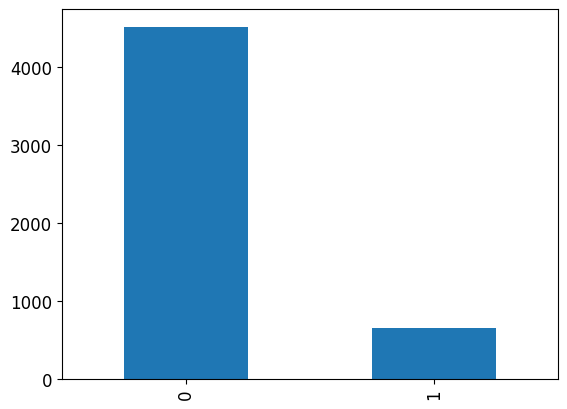

In [ ]:
#데이터 분포 확인
data['v1'].value_counts().plot(kind='bar')

In [ ]:
print(data.groupby('v1').size().reset_index(name='count'))

   v1  count
0   0   4516
1   1    653


In [ ]:
#피처 와 레이블 분리
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [ ]:
#토큰화 와 숫자화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장

print(sequences[:5])

[[47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137], [49, 306, 1364, 435, 6, 1767], [53, 537, 8, 20, 4, 1016, 934, 2, 220, 2713, 1365, 706, 2714, 2715, 267, 2716, 70, 2713, 2, 2717, 2, 359, 537, 604, 1205, 82, 436, 185, 707, 437, 4015], [6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152], [935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438]]


In [ ]:
#인덱스 확인
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'call': 17, 'that': 18, 'on': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'at': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'when': 46, 'go': 47, 'from': 48, 'ok': 49, 'out': 50, 'all': 51, 'what': 52, 'free': 53, 'know': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'come': 59, 'am': 60, 'was': 61, 'time': 62, 'its': 63, 'only': 64, 'day': 65, 'want': 66, 'love': 67, 'there': 68, 'he': 69, 'text': 70, 'send': 71, 'going': 72, 'one': 73, 'need': 74, 'by': 75, 'lor': 76, 'home': 77, 'as': 78, 'about': 79, 'still': 80, 'see': 81, 'txt': 82, 'back': 83, 'r': 84, 'stop': 85, 'da': 86, 'k': 87, 'today': 88, 'our': 89, "i'll": 90, 'dont': 91, 'reply': 

In [ ]:
#빈도 수 확인
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도 수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도 수 총 합
rare_freq = 0 # 등장 빈도 수가 threshold보다 작은 단어의 등장 빈도 수의 총 합

# 단어와 빈도 수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value
  # 단어의 등장 빈도 수가 threshold보다 작으면
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4908
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.02242152466368
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.082538108811501


In [ ]:
#단어 집합의 크기 설정
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 8921


메일의 최대 길이 : 189
메일의 평균 길이 : 15.610370


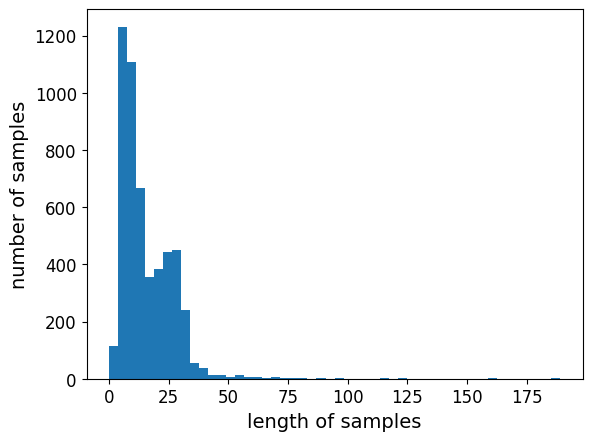

In [ ]:
#메일의 길이 확인
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
#문장에 패딩 적용
max_len = 189
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (5169, 189)


In [ ]:
#훈련 데이터 와 테스트 데이터 분리
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


In [ ]:
#모델 생성 및 훈련
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/10
52/52 [==============================] - 4s 47ms/step - loss: 0.2750 - acc: 0.9105 - val_loss: 0.2526 - val_acc: 0.8972
Epoch 2/10
52/52 [==============================] - 2s 42ms/step - loss: 0.1050 - acc: 0.9713 - val_loss: 0.0810 - val_acc: 0.9770
Epoch 3/10
52/52 [==============================] - 2s 41ms/step - loss: 0.0897 - acc: 0.9716 - val_loss: 0.1732 - val_acc: 0.9395
Epoch 4/10
52/52 [==============================] - 2s 42ms/step - loss: 0.1684 - acc: 0.9317 - val_loss: 0.0868 - val_acc: 0.9710
Epoch 5/10
52/52 [==============================] - 2s 44ms/step - loss: 0.1206 - acc: 0.9492 - val_loss: 0.0790 - val_acc: 0.9770
Epoch 6/10
52/52 [==============================] - 2s 44ms/step - loss: 0.0338 - acc: 0.9909 - val_loss: 0.0559 - val_acc: 0.9843
Epoch 7/10
52/52 [==============================] - 2s 41ms/step - loss: 0.0243 - acc: 0.9937 - val_loss: 0.0564 - val_acc: 0.9855
Epoch 8/10
52/52 [==============================] - 2s 42ms/step - loss: 0.0158 - a

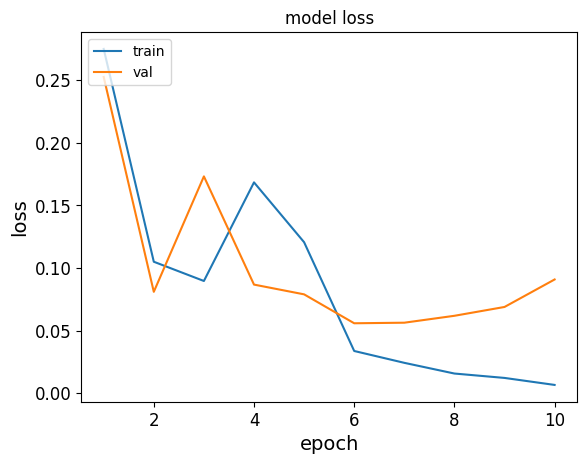

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### GRU를 이용한 네이버 쇼핑 리뷰 감성 분석

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### 데이터 가져오기

In [ ]:
total_data = pd.read_table('/content/drive/MyDrive/ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [ ]:
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


#### 레이블 생성

In [ ]:
# 감성 분석의 대상이 없으므로 레이블을 직접 생성
# ratings 가 3점이 넘는 경우 1, 아니면 0으로 생성

total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


#### 리뷰의 수 확인

In [ ]:
total_data['ratings'].nunique(),total_data['reviews'].nunique(),total_data['label'].nunique()


(4, 199908, 2)

#### 중복 제거

In [ ]:
 # reviews 열에서 중복인 내용이 있다면 중복 제거
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 199908


#### 결측치 확인

In [ ]:
# 위에서 결측치를 제거해서 null 데이터가 없음
print(total_data.isnull().values.any())

False


#### 훈련 데이터 와 테스트 데이터 분리

In [ ]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)

print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 150000
테스트용 리뷰의 개수 : 50000


#### 레이블 분포 확인

<Axes: >

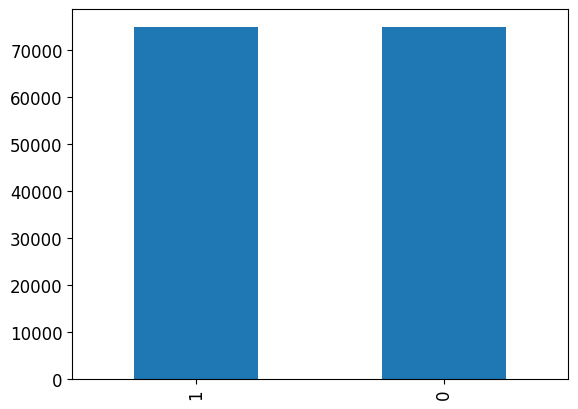

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
# 레이블의 분포를 확인했을 때 데이터가 고르게 분포되어 있음
# 고르지 않다면 추가적으로 처리가 필요

print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  75076
1      1  74924


#### 데이터 전처리

In [ ]:
# 한글과 공백을 제외하고 모두 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

ratings    0
reviews    0
label      0
dtype: int64


In [ ]:
# 테스트 데이터에서도 제거
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 49995


#### 데이터 토큰화

In [ ]:
mecab = Mecab()
#print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

# 한글은 토큰화 하기 전에 형태소 분석을 하고 토큰화를 수행해야 함
train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

#### 레이블에 따라서 별도로 단어들의 리스트를 저장

In [ ]:
# 레이블에 따라서 토큰화 된 단어를 저장
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [ ]:
# 부정 단어 리스트 확인
# 레이블에 따라서 분류한 단어에서 등장한 횟수 확인
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('네요', 31906), ('는데', 20210), ('안', 19751), ('어요', 14832), ('있', 13150), ('너무', 13107), ('했', 11743), ('배송', 9831), ('좋', 9757), ('같', 8993), ('거', 8919), ('구매', 8843), ('어', 8838), ('없', 8771), ('아요', 8623), ('습니다', 8432), ('되', 8391), ('그냥', 8380), ('잘', 8031), ('않', 7917)]


In [ ]:
# 긍정 단어 리스트
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('좋', 39525), ('아요', 21105), ('네요', 19841), ('어요', 18592), ('잘', 18536), ('구매', 16229), ('습니다', 13515), ('있', 12421), ('배송', 12322), ('는데', 11653), ('합니다', 9792), ('했', 9698), ('먹', 9617), ('재', 9363), ('너무', 8389), ('같', 7819), ('만족', 7292), ('거', 6558), ('쓰', 6367), ('어', 6326)]


#### 단어 길이 확인

긍정 리뷰의 평균 길이 : 13.577278308686136
부정 리뷰의 평균 길이 : 17.04011934572966


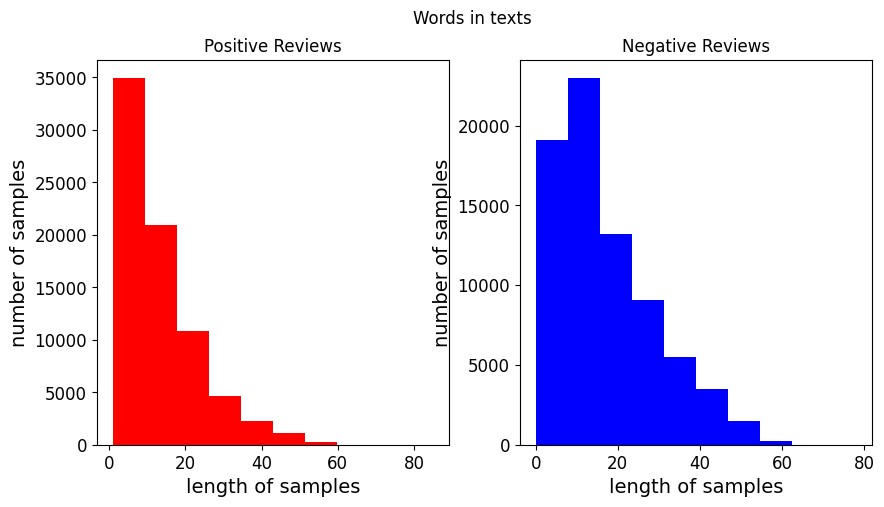

In [ ]:
# 각 레이블 별 리뷰 문장의 길이 시각화해서 확인

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

#### 데이터 생성

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

#### 정수 인코딩

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# 전체 단어에서 희귀 단어 확인
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    # 희소한 단어의 수를 증가시키고 값(value) 를 추가
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 40224
등장 빈도가 1번 이하인 희귀 단어의 수: 18340
단어 집합에서 희귀 단어의 비율: 45.59466984884646
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7985829289618248


#### 1번만 등장한 단어 제외

In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 21886


#### OOV 처리

In [ ]:
# OOV 를 처리하고 숫자로 변환
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

print(X_train[:3])

[[83, 235, 36, 181, 62, 117, 14, 12, 230, 486, 370, 27, 15, 12], [45, 6754, 8501, 6474, 300, 7, 10, 20, 27, 15, 45, 74, 318, 11372, 98, 549, 263, 361, 10, 20, 17, 8, 17, 277, 73, 250, 911, 227, 1863, 1081, 254, 49, 52, 30, 1152, 307], [814, 7, 24, 37, 12, 903, 7, 188, 27, 15, 6]]


In [ ]:
print(X_test[:3])

[[263, 10, 3, 6, 976, 112, 1037, 612, 98, 210, 1161, 8, 2, 191, 57, 23, 179, 44, 42, 307], [519, 7, 3946, 17, 567, 8, 4, 62, 3, 483], [21, 9, 11, 533, 176, 1224, 7, 18, 4, 1500, 56, 3, 2]]


#### 패딩

리뷰의 최대 길이 : 85
리뷰의 평균 길이 : 15.310453333333333


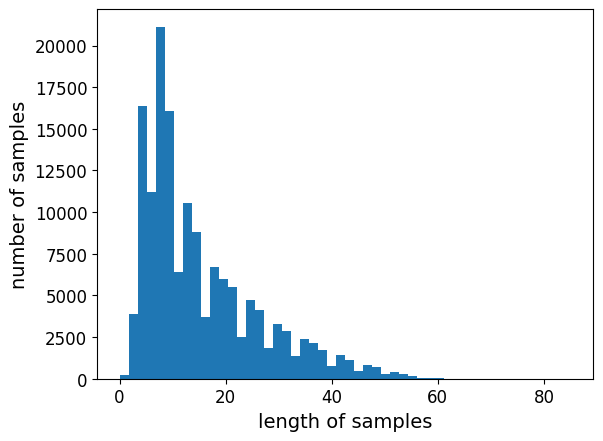

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.99866666666667


In [ ]:
# 모든 데이터를 80개의 단어로 구성 - sequence 가 80이 됨
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

#### 모델 생성 과 훈련

In [ ]:
# 모델로 GRU 를 사용

from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
# Embedding 은 데이터를 일정한 차원의 숫자로 변경해주는 층
# 문장이나 단어를 일반적인 index 로 수치화를 하게 되면
# 거리의 개념이 없기 때문에 유사도 분석을 할 수 없음
# 유사도 분석을 이용해서 단어나 문장의 거리를 비교하고자 하는 경우에는
# 여기처럼 Embedding 층을 사용하거나 직접 수치화를 해줘야 함
# 각 단어들을 100 차원의 숫자로 변환
model.add(Embedding(vocab_size, 100))
# RNN 층을 사용
model.add(GRU(128))
# 0과 1로 분류하는 거라서 출력 뉴런의 갯수는 1개이고 활성화 함수는 sigmoid 사용
# 다중 분류의 경우에는 softmax 를 사용해야 함
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1562/1562 [==============================] - 24s 15ms/step - loss: 0.2189 - acc: 0.9222

 테스트 정확도: 0.9222


#### 리뷰 예측

In [ ]:
# 입력한 문장에 대해서 처리를 하고 모델에 넣어서 예측하는 함수
# 점수가 0.5 를 넘는 경우 긍정으로 판단
def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')
sentiment_predict('진짜 배송도 늦고 짜증나네요. 뭐 이런 걸 상품이라고 만듬?')
sentiment_predict('판매자님... 너무 짱이에요.. 대박나삼')
sentiment_predict('ㅁㄴㅇㄻㄴㅇㄻㄴㅇ리뷰쓰기도 귀찮아요')

1/1 [==============================] - 0s 479ms/step
98.35% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 26ms/step
99.19% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 25ms/step
97.41% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 26ms/step
89.66% 확률로 부정 리뷰입니다.


## 양방향 LSTM을 이용한 품사 태깅

In [ ]:
import nltk
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

### 영어 코퍼스에 토큰화 와 품사 태깅 전처리를 진행한 문장 데이터 가져오기

In [ ]:
tagged_sentences = nltk.corpus.treebank.tagged_sents() # 토큰화에 품사 태깅이 된 데이터 받아오기
print("품사 태깅이 된 문장 개수: ", len(tagged_sentences)) # 문장 샘플의 개수 출력

품사 태깅이 된 문장 개수:  3914


### 첫번째 샘플 출력

In [ ]:
print(tagged_sentences[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


### 단어는 sentences에 태깅 정보는 pos_tags에 저장

In [ ]:
sentences, pos_tags = [], []
for tagged_sentence in tagged_sentences: # 3,914개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 품사 태깅 정보들은 tag_info에 저장한다.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    pos_tags.append(list(tag_info)) # 각 샘플에서 품사 태깅 정보만 저장한다.

print(sentences[0])
print(pos_tags[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.']


In [ ]:
print(sentences[8])
print(pos_tags[8])

['We', "'re", 'talking', 'about', 'years', 'ago', 'before', 'anyone', 'heard', 'of', 'asbestos', 'having', 'any', 'questionable', 'properties', '.']
['PRP', 'VBP', 'VBG', 'IN', 'NNS', 'IN', 'IN', 'NN', 'VBD', 'IN', 'NN', 'VBG', 'DT', 'JJ', 'NNS', '.']


### 각 샘플의 길이 확인

샘플의 최대 길이 : 271
샘플의 평균 길이 : 25.722024


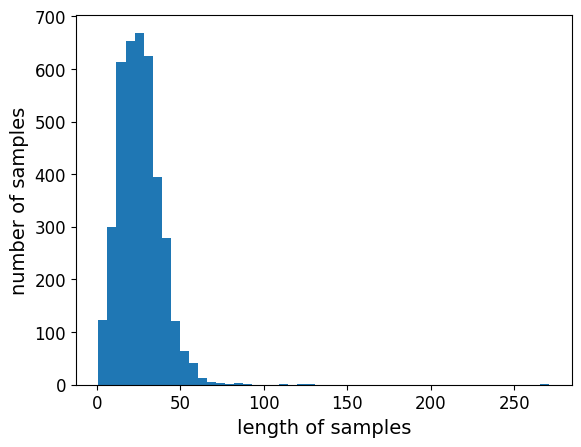

In [ ]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 정수 인코딩

In [ ]:
def tokenize(samples):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(samples)
  return tokenizer

src_tokenizer = tokenize(sentences)
tar_tokenizer = tokenize(pos_tags)

vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 11388
태깅 정보 집합의 크기 : 47


In [ ]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(pos_tags)

print(X_train[:2])
print(y_train[:2])

[[5601, 3746, 1, 2024, 86, 331, 1, 46, 2405, 2, 131, 27, 6, 2025, 332, 459, 2026, 3], [31, 3746, 20, 177, 4, 5602, 2915, 1, 2, 2916, 637, 147, 3]]
[[3, 3, 8, 10, 6, 7, 8, 21, 13, 4, 1, 2, 4, 7, 1, 3, 10, 9], [3, 3, 17, 1, 2, 3, 3, 8, 4, 3, 19, 1, 9]]


### 패딩

In [ ]:
max_len = 150
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
# X_train의 모든 샘플의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
# y_train의 모든 샘플의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.

### 훈련 데이터 와 테스트 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (3131, 150)
훈련 샘플 레이블의 크기 : (3131, 150, 47)
테스트 샘플 문장의 크기 : (783, 150)
테스트 샘플 레이블의 크기 : (783, 150, 47)


### POS Tagger 모델 생성 및 훈련

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
# from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))
model.compile(loss='categorical_crossentropy', optimizer= "adam", metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=6,  validation_data=(X_test, y_test))

Epoch 1/6
25/25 [==============================] - 40s 854ms/step - loss: 3.3280 - accuracy: 0.1452 - val_loss: 2.9482 - val_accuracy: 0.1633
Epoch 2/6
25/25 [==============================] - 14s 566ms/step - loss: 2.8344 - accuracy: 0.2519 - val_loss: 2.6386 - val_accuracy: 0.3669
Epoch 3/6
25/25 [==============================] - 14s 557ms/step - loss: 2.2661 - accuracy: 0.4513 - val_loss: 1.7822 - val_accuracy: 0.5448
Epoch 4/6
25/25 [==============================] - 13s 539ms/step - loss: 1.3621 - accuracy: 0.6631 - val_loss: 0.9843 - val_accuracy: 0.7798
Epoch 5/6
25/25 [==============================] - 13s 534ms/step - loss: 0.6847 - accuracy: 0.8556 - val_loss: 0.5405 - val_accuracy: 0.8750
Epoch 6/6
25/25 [==============================] - 14s 542ms/step - loss: 0.3504 - accuracy: 0.9250 - val_loss: 0.3681 - val_accuracy: 0.9103


In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

25/25 [==============================] - 2s 84ms/step - loss: 0.3679 - accuracy: 0.9103

 테스트 정확도: 0.9103


### 실제값 과 예측값 확인

In [ ]:
index_to_word=src_tokenizer.index_word
index_to_tag=tar_tokenizer.index_word

i=10 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_tag[t].upper(), index_to_tag[pred].upper()))

1/1 [==============================] - 3s 3s/step
단어             |실제값  |예측값
-----------------------------------
in               : IN      IN
addition         : NN      NN
,                : ,       ,
buick            : NNP     NNP
is               : VBZ     VBZ
a                : DT      DT
relatively       : RB      RB
respected        : VBN     VBN
nameplate        : NN      NN
among            : IN      IN
american         : NNP     NNP
express          : NNP     NNP
card             : NN      NN
holders          : NNS     NNS
,                : ,       ,
says             : VBZ     VBZ
0                : -NONE-  -NONE-
*t*-1            : -NONE-  -NONE-
an               : DT      DT
american         : NNP     NNP
express          : NNP     NNP
spokeswoman      : NN      NN
.                : .       .


## NLTK를 이용한 개체명 인식(Named Entity Recognition using NTLK)

### 토큰화 와 품사 태깅

In [ ]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

from nltk import word_tokenize, pos_tag, ne_chunk

sentence = "James is working at Disney in London"
sentence=pos_tag(word_tokenize(sentence))
print(sentence) # 토큰화와 품사 태깅을 동시 수행

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


### 개체명 인식

In [ ]:
#nltk.download('maxent_ne_chunker')

sentence=ne_chunk(sentence)
print(sentence) # 개체명 인식

(S
  (PERSON James/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Disney/NNP)
  in/IN
  (GPE London/NNP))


## 개체명 인식 모델 생성

In [ ]:
import re
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import urllib.request

### 데이터 가져오기

In [ ]:
# url 에서 다운로드 받아서 filename 으로 저장
urllib.request.urlretrieve("https://raw.githubusercontent.com/Franck-Dernoncourt/NeuroNER/master/neuroner/data/conll2003/en/train.txt",
                           filename="/content/drive/MyDrive/train.txt")

f = open('/content/drive/MyDrive/train.txt', 'r')
tagged_sentences = []
sentence = []

# 품사 태깅을 위한 데이터를 순회 - 위에서 다운받은 파일
for line in f:
    # 문장의 길이가 0이거나 '-DOCSTART' 로 시작하거나 줄 바꿈이 존재하는 경우
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
        # 이전 리스트에 빈 공간을 하나 추가
        if len(sentence) > 0:
            tagged_sentences.append(sentence)
            sentence = []
        continue
    splits = line.split(' ') # 공백을 기준으로 속성을 구분한다.
    splits[-1] = re.sub(r'\n', '', splits[-1]) # 줄바꿈 표시 \n을 제거한다.
    word = splits[0].lower() # 단어들은 소문자로 바꿔서 저장한다.
    sentence.append([word, splits[-1]]) # 단어와 개체명 태깅만 기록한다.


In [ ]:
print("전체 샘플 개수: ", len(tagged_sentences)) # 전체 샘플의 개수 출력

전체 샘플 개수:  14041


In [ ]:
# 소문자로 변환된 단어와 개체명을 출력
print(tagged_sentences[0]) # 첫번째 샘플 출력

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]


### 단어 정보 와 태깅 정보를 분리

In [ ]:
sentences, ner_tags = [], []

# 모든 샘플 데이터 읽기
for tagged_sentence in tagged_sentences: # 14,041개의 문장 샘플을 1개씩 불러온다.
    # 각 문장들을 단어 정보와 개체명으로 분할
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 각 샘플에서 개체명 태깅 정보만 저장한다.

# 문장(단어) 는 피처, 태그는 타겟이 됨
print(sentences[0])
print(ner_tags[0])

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


In [ ]:
print(sentences[12])
print(ner_tags[12])

['only', 'france', 'and', 'britain', 'backed', 'fischler', "'s", 'proposal', '.']
['O', 'B-LOC', 'O', 'B-LOC', 'O', 'B-PER', 'O', 'O', 'O']


### 각 단어의 길이 확인

샘플의 최대 길이 : 113
샘플의 평균 길이 : 14.501887


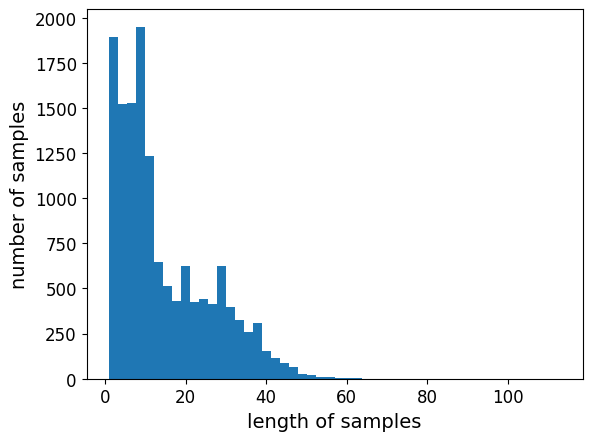

In [ ]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 케라스 토크나이저를 통해서 토큰화와 정수 인코딩

In [ ]:
# 데이터 토큰화

max_words = 4000
src_tokenizer = Tokenizer(num_words=max_words, oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)

vocab_size = max_words
tag_size = len(tar_tokenizer.word_index) + 1

print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 4000
개체명 태깅 정보 집합의 크기 : 10


In [ ]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

print(X_train[0])
print(y_train[0])

[989, 1, 205, 629, 7, 3939, 216, 1, 3]
[4, 1, 7, 1, 1, 1, 7, 1, 1]


### 디코딩

In [ ]:
# 인덱스를 가지고 다시 단어로 디코딩
# 빈도수가 낮은 단어는 OOV 처리를 함

index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

decoded = []
for index in X_train[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존 문장 : {}'.format(sentences[0]))
print('빈도수가 낮은 단어가 OOV 처리된 문장 : {}'.format(decoded))

기존 문장 : ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
빈도수가 낮은 단어가 OOV 처리된 문장 : ['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']


### 패딩

In [ ]:
max_len = 70
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
# X_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
# y_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자0으로 채움.

### 훈련 데이터 와 테스트 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

### 원 핫 인코딩

In [ ]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (11232, 70)
훈련 샘플 레이블의 크기 : (11232, 70, 10)
테스트 샘플 문장의 크기 : (2809, 70)
테스트 샘플 레이블의 크기 : (2809, 70, 10)


### 모델 생성 및 훈련

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=8,  validation_data=(X_test, y_test))

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1/8
88/88 [==============================] - 45s 354ms/step - loss: 0.9000 - accuracy: 0.8241 - val_loss: 0.6247 - val_accuracy: 0.8325
Epoch 2/8
88/88 [==============================] - 22s 250ms/step - loss: 0.4749 - accuracy: 0.8566 - val_loss: 0.3684 - val_accuracy: 0.8900
Epoch 3/8
88/88 [==============================] - 22s 251ms/step - loss: 0.3061 - accuracy: 0.9083 - val_loss: 0.2548 - val_accuracy: 0.9241
Epoch 4/8
88/88 [==============================] - 22s 252ms/step - loss: 0.2169 - accuracy: 0.9363 - val_loss: 0.1956 - val_accuracy: 0.9449
Epoch 5/8
88/88 [==============================] - 22s 251ms/step - loss: 0.1670 - accuracy: 0.9505 - val_loss: 0.1802 - val_accuracy: 0.9498
Epoch 6/8
88/88 [==============================] - 22s 250ms/step - loss: 0.1418 - accuracy: 0.9577 - val_loss: 0.1693 - val_accuracy: 0.9526
Epoch 7/8
88/88 [==============================] - 22s 253ms/step - loss: 0.1191 - accuracy: 0.9645 - val_loss: 0.1583 - val_accuracy: 0.9550
Epoch 

### 예측

In [ ]:
i=10 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))

1/1 [==============================] - 7s 7s/step
단어             |실제값  |예측값
-----------------------------------
sarah            : B-PER   B-PER
brady            : I-PER   I-PER
,                : O       O
whose            : O       O
republican       : B-MISC  B-MISC
husband          : O       O
was              : O       O
OOV              : O       O
OOV              : O       O
in               : O       O
an               : O       O
OOV              : O       O
attempt          : O       O
on               : O       O
president        : O       O
ronald           : B-PER   B-PER
reagan           : I-PER   I-PER
,                : O       O
took             : O       O
centre           : O       O
stage            : O       O
at               : O       O
the              : O       O
democratic       : B-MISC  B-MISC
national         : I-MISC  I-MISC
convention       : I-MISC  I-MISC
on               : O       O
monday           : O       O
night            : O       O
to         

## Subword Tokenizer

### BPE 알고리즘

In [ ]:
# collections 는 Counter 에 사용
# 데이터의 갯수를 빠르게 셀 수 있음
import re, collections
from IPython.display import display, Markdown, Latex

num_merges = 10

dictionary = {'l o w </w>' : 5,
         'l o w e r </w>' : 2,
         'n e w e s t </w>':6,
         'w i d e s t </w>':3
         }

# dict 를 받아서 공백 단위로 나누고 갯수(단어의 빈도수)를 세는 함수
def get_stats(dictionary):
    # 유니그램의 pair들의 빈도수를 카운트
    pairs = collections.defaultdict(int)
    for word, freq in dictionary.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    print('현재 pair들의 빈도수 :', dict(pairs))
    return pairs

# dict 를 합치는 함수
def merge_dictionary(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

bpe_codes = {}
bpe_codes_reverse = {}

# Markdown 은 jupyter notebook 처럼 텍스트를 특별하게 출력하기 위해 사용
for i in range(num_merges):
    display(Markdown("### Iteration {}".format(i + 1)))
    pairs = get_stats(dictionary)
    best = max(pairs, key=pairs.get)
    dictionary = merge_dictionary(best, dictionary)

    bpe_codes[best] = i
    bpe_codes_reverse[best[0] + best[1]] = best

    print("new merge: {}".format(best))
    print("dictionary: {}".format(dictionary))

### Iteration 1

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}


### Iteration 2

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
new merge: ('es', 't')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}


### Iteration 3

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
new merge: ('est', '</w>')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 4

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('l', 'o')
dictionary: {'lo w </w>': 5, 'lo w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 5

현재 pair들의 빈도수 : {('lo', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('lo', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 6

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('n', 'e')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'ne w est</w>': 6, 'w i d est</w>': 3}


### Iteration 7

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('ne', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('ne', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'new est</w>': 6, 'w i d est</w>': 3}


### Iteration 8

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('new', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('new', 'est</w>')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 9

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('low', '</w>')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 10

현재 pair들의 빈도수 : {('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('w', 'i')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'wi d est</w>': 3}


In [ ]:
#merge 했던 기록 확인
print(bpe_codes)

{('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8, ('w', 'i'): 9}


### BPE 알고리즘을 이용한 OOV 대처

In [ ]:
def get_pairs(word):
    """Return set of symbol pairs in a word.
    Word is represented as a tuple of symbols (symbols being variable-length strings).
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs


def encode(orig):
    """Encode word based on list of BPE merge operations, which are applied consecutively"""

    word = tuple(orig) + ('</w>',)
    display(Markdown("__word split into characters:__ <tt>{}</tt>".format(word)))

    pairs = get_pairs(word)

    if not pairs:
        return orig

    iteration = 0
    while True:
        iteration += 1
        display(Markdown("__Iteration {}:__".format(iteration)))

        print("bigrams in the word: {}".format(pairs))
        bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))
        print("candidate for merging: {}".format(bigram))
        if bigram not in bpe_codes:
            display(Markdown("__Candidate not in BPE merges, algorithm stops.__"))
            break
        first, second = bigram
        new_word = []
        i = 0
        while i < len(word):
            try:
                j = word.index(first, i)
                new_word.extend(word[i:j])
                i = j
            except:
                new_word.extend(word[i:])
                break

            if word[i] == first and i < len(word)-1 and word[i+1] == second:
                new_word.append(first+second)
                i += 2
            else:
                new_word.append(word[i])
                i += 1
        new_word = tuple(new_word)
        word = new_word
        print("word after merging: {}".format(word))
        if len(word) == 1:
            break
        else:
            pairs = get_pairs(word)

    # 특별 토큰인 </w>는 출력하지 않는다.
    if word[-1] == '</w>':
        word = word[:-1]
    elif word[-1].endswith('</w>'):
        word = word[:-1] + (word[-1].replace('</w>',''),)

    return word

In [ ]:
encode("loki")

__word split into characters:__ <tt>('l', 'o', 'k', 'i', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('k', 'i'), ('l', 'o'), ('i', '</w>'), ('o', 'k')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'k', 'i', '</w>')


__Iteration 2:__

bigrams in the word: {('i', '</w>'), ('k', 'i'), ('lo', 'k')}
candidate for merging: ('i', '</w>')


__Candidate not in BPE merges, algorithm stops.__

('lo', 'k', 'i')

In [ ]:
encode("lowest")

__word split into characters:__ <tt>('l', 'o', 'w', 'e', 's', 't', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('t', '</w>'), ('w', 'e'), ('o', 'w'), ('s', 't'), ('e', 's'), ('l', 'o')}
candidate for merging: ('e', 's')
word after merging: ('l', 'o', 'w', 'es', 't', '</w>')


__Iteration 2:__

bigrams in the word: {('t', '</w>'), ('es', 't'), ('o', 'w'), ('l', 'o'), ('w', 'es')}
candidate for merging: ('es', 't')
word after merging: ('l', 'o', 'w', 'est', '</w>')


__Iteration 3:__

bigrams in the word: {('w', 'est'), ('l', 'o'), ('est', '</w>'), ('o', 'w')}
candidate for merging: ('est', '</w>')
word after merging: ('l', 'o', 'w', 'est</w>')


__Iteration 4:__

bigrams in the word: {('w', 'est</w>'), ('l', 'o'), ('o', 'w')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'est</w>')


__Iteration 5:__

bigrams in the word: {('w', 'est</w>'), ('lo', 'w')}
candidate for merging: ('lo', 'w')
word after merging: ('low', 'est</w>')


__Iteration 6:__

bigrams in the word: {('low', 'est</w>')}
candidate for merging: ('low', 'est</w>')


__Candidate not in BPE merges, algorithm stops.__

('low', 'est')

In [ ]:
encode("lowing")

__word split into characters:__ <tt>('l', 'o', 'w', 'i', 'n', 'g', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('w', 'i'), ('n', 'g'), ('i', 'n'), ('o', 'w'), ('g', '</w>'), ('l', 'o')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'i', 'n', 'g', '</w>')


__Iteration 2:__

bigrams in the word: {('lo', 'w'), ('w', 'i'), ('n', 'g'), ('i', 'n'), ('g', '</w>')}
candidate for merging: ('lo', 'w')
word after merging: ('low', 'i', 'n', 'g', '</w>')


__Iteration 3:__

bigrams in the word: {('g', '</w>'), ('i', 'n'), ('n', 'g'), ('low', 'i')}
candidate for merging: ('g', '</w>')


__Candidate not in BPE merges, algorithm stops.__

('low', 'i', 'n', 'g')

In [ ]:
encode("highing")

__word split into characters:__ <tt>('h', 'i', 'g', 'h', 'i', 'n', 'g', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('i', 'g'), ('n', 'g'), ('i', 'n'), ('g', 'h'), ('h', 'i'), ('g', '</w>')}
candidate for merging: ('i', 'g')


__Candidate not in BPE merges, algorithm stops.__

('h', 'i', 'g', 'h', 'i', 'n', 'g')

## IMDB 리뷰 토큰화하기

In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.6 MB/s eta 0:00:00


In [ ]:
import sentencepiece as spm
import pandas as pd
import urllib.request
import csv

### 데이터 가져오기

In [ ]:
# 웹에서 텍스트 파일을 읽고 로컬에 파일로 저장
# 웹에서 파일을 다운 받고 로컬에 저장하는 코드와 나머지가 함께 있다면
# 둘을 분리하는게 좋음 - 여기에선 read_csv 아래를 별도로 나누는게 좋음
# 로컬에서 데이터를 읽어오는 코드도 별도로 구현하는게 좋음
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

train_df = pd.read_csv('IMDb_Reviews.csv')
train_df['review']

0        My family and I normally do not watch local mo...
1        Believe it or not, this was at one time the wo...
2        After some internet surfing, I found the "Home...
3        One of the most unheralded great works of anim...
4        It was the Sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are SICK AND ...
49996    The script is so so laughable... this in turn,...
49997    "So there's this bride, you see, and she gets ...
49998    Your mind will not be satisfied by this nobud...
49999    The chaser's war on everything is a weekly sho...
Name: review, Length: 50000, dtype: object

In [ ]:
print('리뷰 개수 :',len(train_df)) # 리뷰 개수 출력

리뷰 개수 : 50000


### DataFrame 을 파일에 저장

In [ ]:
with open('imdb_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(train_df['review']))

### 센텐스피스로 단어 집합과 각 단어에 고유한 정수 부여

In [ ]:
# sentencepiece 를 수행하는 코드
# 보통은 텍스트 파일을 사용해서 로컬에서 직접 수행함
# model_prefix : 만들어질 모델 이름
# model_type : 사용할 모델 (unigram(default), bpe 등)
spm.SentencePieceTrainer.Train('--input=imdb_review.txt --model_prefix=imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

### 단어 집합의 크기를 확인하기 위해서 imdb.vocab 파일을 읽기

In [ ]:
# 앞에서 작업한 내용 확인
# 단어와 인덱스가 리턴됨
vocab_list = pd.read_csv('imdb.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list.sample(10)

,0,1
1501,▁New,-1498
2586,bor,-2583
2653,▁older,-2650
1055,▁TH,-1052
705,hen,-702
106,▁movie,-103
589,▁these,-586
2468,uro,-2465
2413,omin,-2410
1600,amed,-1597


In [ ]:
len(vocab_list)

5000

### model 파일을 로드하여 단어 시퀀스를 정수 시퀀스로 바꾸는 인코딩 작업이나 반대로 변환하는 디코딩 작업을 할 수 있음

In [ ]:
# sentencepiece 객체를 이용해서 모델을 파일을 로드

sp = spm.SentencePieceProcessor()
vocab_file = "imdb.model"
sp.load(vocab_file)

True

### 여러가지 도구

In [ ]:
lines = [
  "I didn't at all think of it this way.",
  "I have waited a long time for someone to film"
]
for line in lines:
  print(line)
  # 분할된 단어를 조회
  print(sp.encode_as_pieces(line))
  # 분할된 단어의 인덱스를 조회
  print(sp.encode_as_ids(line))
  print()

I didn't at all think of it this way.
['▁I', '▁didn', "'", 't', '▁at', '▁all', '▁think', '▁of', '▁it', '▁this', '▁way', '.']
[41, 624, 4950, 4926, 139, 170, 378, 30, 58, 73, 413, 4945]

I have waited a long time for someone to film
['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 142, 1364, 1121, 4, 668, 285, 93, 1079, 33, 91]



In [ ]:
sp.GetPieceSize()

5000

In [ ]:
sp.IdToPiece(430)

'▁character'

In [ ]:
# 단어를 입력해서 인덱스를 찾을 수 있음
sp.PieceToId('▁character')

430

In [ ]:
# 숫자 열을 가지고 문장으로 복원하는 함수
sp.DecodeIds([41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91])

'Iul wa fall aold timeooland to film'

In [ ]:
sp.DecodePieces(['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film'])

'I have waited a long time for someone to film'

In [ ]:
print(sp.encode('I have waited a long time for someone to film', out_type=str))
print(sp.encode('I have waited a long time for someone to film', out_type=int))

['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 142, 1364, 1121, 4, 668, 285, 93, 1079, 33, 91]


## 네이버 영화 리뷰 토큰화

In [ ]:
import pandas as pd
import sentencepiece as spm
import urllib.request
import csv

### 네이버 영화 리뷰 데이터를 다운로드하여 데이터프레임에 저장

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
naver_df = pd.read_table('ratings.txt')
naver_df[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


### 데이터 전처리

In [ ]:
print('리뷰 개수 :',len(naver_df)) # 리뷰 개수 출력

리뷰 개수 : 200000


In [ ]:
#네이버 영화 리뷰 데이터의 경우 Null 값이 존재하므로 이를 제거한 후에 수행합니다.
print(naver_df.isnull().values.any())

True


In [ ]:
naver_df = naver_df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(naver_df.isnull().values.any()) # Null 값이 존재하는지 확인
print('리뷰 개수 :',len(naver_df)) # 리뷰 개수 출력

False
리뷰 개수 : 199992


### 199,992개의 샘플을 naver_review.txt 파일에 저장한 후에 센텐스피스를 통해 단어 집합을 생성

In [ ]:
with open('naver_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(naver_df['document']))

### vocab 생성

In [ ]:
# sentencepiece 를 적용
spm.SentencePieceTrainer.Train('--input=naver_review.txt --model_prefix=naver --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')
#vocab 생성이 완료되면 naver.model, naver.vocab 파일 두개가 생성 됩니다. .vocab 에서 학습된 subwords를 확인할 수 있습니다.

In [ ]:
vocab_list = pd.read_csv('naver.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list[:10]

#Vocabulary 에는 unknown, 문장의 시작, 문장의 끝을 의미하는 special token이 0, 1, 2에 사용되었습니다.

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,..,0
4,영화,-1
5,▁영화,-2
6,▁이,-3
7,▁아,-4
8,...,-5
9,ᄏᄏ,-6


In [ ]:
vocab_list.sample(10)

,0,1
1078,▁T,-1075
2889,▁맡,-2886
2303,수있는,-2300
2301,▁다소,-2298
107,이라,-104
4026,<,-4023
4133,땅,-4130
3206,▁마세요,-3203
1183,▁눈물이,-1180
3831,벌,-3828


In [ ]:
len(vocab_list)

5000

In [ ]:
sp = spm.SentencePieceProcessor()
vocab_file = "naver.model"
sp.load(vocab_file)

True

### 문장 서브워드 토큰화

In [ ]:
lines = [
  "뭐 이딴 것도 영화냐.",
  "진짜 최고의 영화입니다 ㅋㅋ",
]
for line in lines:
  print(line)
  print(sp.encode_as_pieces(line))
  print(sp.encode_as_ids(line))
  print()

뭐 이딴 것도 영화냐.
['▁뭐', '▁이딴', '▁것도', '▁영화냐', '.']
[136, 970, 1299, 2593, 3276]

진짜 최고의 영화입니다 ㅋㅋ
['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 204, 825, 121]



### 토큰화 확인

In [ ]:
sp.GetPieceSize()

5000

In [ ]:
sp.IdToPiece(4)

'영화'

In [ ]:
sp.PieceToId('영화')

4

In [ ]:
sp.DecodeIds([54, 200, 821, 85])

'진짜 원 산~~'

In [ ]:
sp.DecodePieces(['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ'])

'진짜 최고의 영화입니다 ᄏᄏ'

In [ ]:
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=str))
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=int))

['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 204, 825, 121]


## SubwordTextEncoder를 이용한 IMDB 리뷰 토큰화

### 데이터 가져오기

In [ ]:
import tensorflow_datasets as tfds
import urllib.request
import pandas as pd

urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

train_df = pd.read_csv('IMDb_Reviews.csv')

train_df['review']

0        My family and I normally do not watch local mo...
1        Believe it or not, this was at one time the wo...
2        After some internet surfing, I found the "Home...
3        One of the most unheralded great works of anim...
4        It was the Sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are SICK AND ...
49996    The script is so so laughable... this in turn,...
49997    "So there's this bride, you see, and she gets ...
49998    Your mind will not be satisfied by this nobud...
49999    The chaser's war on everything is a weekly sho...
Name: review, Length: 50000, dtype: object

### 서브워드들로 이루어진 단어 집합(Vocabulary)를 생성하고, 각 서브워드에 고유한 정수를 부여

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(train_df['review'], target_vocab_size=2**13)

### 10개 출력

In [ ]:
print(tokenizer.subwords[:100])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 't_', 'as_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', 'are_', ' (', 'have_', 'his_', 'film_', 'not_', 'be_', 'you_', 'ing_', ' "', 'ed_', 'it', 'd_', 'an_', 'at_', 'by_', 'he_', 'one_', 'who_', 'from_', 'y_', 'or_', 'e_', 'like_', 'all_', '" ', 'they_', 'so_', 'just_', 'has_', ') ', 'about_', 'her_', 'out_', 'This_', 'some_', 'movie', 'ly_', 'film', 'very_', 'more_', 'It_', 'what_', 'would_', 'when_', 'if_', 'good_', 'up_', 'which_', 'their_', 'only_', 'even_', 'my_', 'really_', 'had_', 'can_', 'no_', 'were_', 'see_', '? ', 'she_', 'than_', '! ', 'there_', 'been_', 'get_', 'into_', 'will_', ' - ', 'much_', 'n_', 'because_', 'ing']


In [ ]:
print(train_df['review'][20])

Pretty bad PRC cheapie which I rarely bother to watch over again, and it's no wonder -- it's slow and creaky and dull as a butter knife. Mad doctor George Zucco is at it again, turning a dimwitted farmhand in overalls (Glenn Strange) into a wolf-man. Unfortunately, the makeup is virtually non-existent, consisting only of a beard and dimestore fangs for the most part. If it were not for Zucco and Strange's presence, along with the cute Anne Nagel, this would be completely unwatchable. Strange, who would go on to play Frankenstein's monster for Unuiversal in two years, does a Lenny impression from "Of Mice and Men", it seems.<br /><br />*1/2 (of Four)


### encode()를 통해서 입력한 데이터에 대해서 정수 인코딩을 수행한 결과

In [ ]:
print('Tokenized sample question: {}'.format(tokenizer.encode(train_df['review'][20])))

Tokenized sample question: [1590, 4162, 132, 7107, 1892, 2983, 578, 76, 12, 4632, 3422, 7, 160, 175, 372, 2, 5, 39, 8051, 8, 84, 2652, 497, 39, 8051, 8, 1374, 5, 3461, 2012, 48, 5, 2263, 21, 4, 2992, 127, 4729, 711, 3, 1391, 8044, 3557, 1277, 8102, 2154, 5681, 9, 42, 15, 372, 2, 3773, 4, 3502, 2308, 467, 4890, 1503, 11, 3347, 1419, 8127, 29, 5539, 98, 6099, 58, 94, 4, 1388, 4230, 8057, 213, 3, 1966, 2, 1, 6700, 8044, 9, 7069, 716, 8057, 6600, 2, 4102, 36, 78, 6, 4, 1865, 40, 5, 3502, 1043, 1645, 8044, 1000, 1813, 23, 1, 105, 1128, 3, 156, 15, 85, 33, 23, 8102, 2154, 5681, 5, 6099, 8051, 8, 7271, 1055, 2, 534, 22, 1, 3046, 5214, 810, 634, 8120, 2, 14, 71, 34, 436, 3311, 5447, 783, 3, 6099, 2, 46, 71, 193, 25, 7, 428, 2274, 2260, 6487, 8051, 8, 2149, 23, 1138, 4117, 6023, 163, 11, 148, 735, 2, 164, 4, 5277, 921, 3395, 1262, 37, 639, 1349, 349, 5, 2460, 328, 15, 5349, 8127, 24, 10, 16, 10, 17, 8054, 8061, 8059, 8062, 29, 6, 6607, 8126, 8053]


### 임의로 선택한 짧은 문장에 대해서 정수 인코딩 결과를 확인하고 이를 다시 역으로 디코딩

In [ ]:
# train_df에 존재하는 문장 중 일부를 발췌
sample_string = "It's mind-blowing to me that this film was even made."

# 인코딩한 결과를 tokenized_string에 저장
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# 이를 다시 디코딩
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [137, 8051, 8, 910, 8057, 2169, 36, 7, 103, 13, 14, 32, 18, 79, 681, 8058]
기존 문장: It's mind-blowing to me that this film was even made.


### 단어 사전의 크기

In [ ]:
print('단어 집합의 크기(Vocab size) :', tokenizer.vocab_size)

단어 집합의 크기(Vocab size) : 8268


In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

137 ----> It
8051 ----> '
8 ----> s 
910 ----> mind
8057 ----> -
2169 ----> blow
36 ----> ing 
7 ----> to 
103 ----> me 
13 ----> that 
14 ----> this 
32 ----> film 
18 ----> was 
79 ----> even 
681 ----> made
8058 ----> .


### 이전 문장에 글자 추가

In [ ]:
#실습한 문장에 even 뒤에 임의로 xyz 추가
sample_string = "It's mind-blowing to me that this film was evenxyz made."

# 인코딩한 결과를 tokenized_string에 저장
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# 이를 다시 디코딩
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [137, 8051, 8, 910, 8057, 2169, 36, 7, 103, 13, 14, 32, 18, 7974, 8132, 8133, 997, 681, 8058]
기존 문장: It's mind-blowing to me that this film was evenxyz made.


In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

137 ----> It
8051 ----> '
8 ----> s 
910 ----> mind
8057 ----> -
2169 ----> blow
36 ----> ing 
7 ----> to 
103 ----> me 
13 ----> that 
14 ----> this 
32 ----> film 
18 ----> was 
7974 ----> even
8132 ----> x
8133 ----> y
997 ----> z 
681 ----> made
8058 ----> .


## 네이버 영화 리뷰 토큰화

### 데이터 가져오기

In [ ]:
import tensorflow_datasets as tfds
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")

train_data = pd.read_table('ratings_train.txt')

print(train_data.isnull().sum())

train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

id          0
document    5
label       0
dtype: int64
False


### tfds.features.text.SubwordTextEncoder.build_from_corpus의 인자로 네이버 영화 리뷰 데이터를 넣어서
### 서브워드들로 이루어진 단어 집합(Vocabulary)를 생성하고, 각 서브워드에 고유한 정수를 부여

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    train_data['document'], target_vocab_size=2**13)

In [ ]:
print(tokenizer.subwords[:100])

['. ', '..', '영화', '이_', '...', '의_', '는_', '도_', '다', ', ', '을_', '고_', '은_', '가_', '에_', '.. ', '한_', '너무_', '정말_', '를_', '고', '게_', '영화_', '지', '... ', '진짜_', '이', '다_', '요', '만_', '? ', '과_', '나', '가', '서_', '지_', '로_', '으로_', '아', '어', '....', '음', '한', '수_', '와_', '도', '네', '그냥_', '나_', '더_', '왜_', '이런_', '면_', '기', '하고_', '보고_', '하는_', '서', '좀_', '리', '자', '스', '안', '! ', '에서_', '영화를_', '미', 'ㅋㅋ', '네요', '시', '주', '라', '는', '오', '없는_', '에', '해', '사', '!!', '영화는_', '마', '잘_', '수', '영화가_', '만', '본_', '로', '그_', '지만_', '대', '은', '비', '의', '일', '개', '있는_', '없다', '함', '구', '하']


In [ ]:
print('Tokenized sample question: {}'.format(tokenizer.encode(train_data['document'][20])))

Tokenized sample question: [669, 4700, 17, 1749, 8, 96, 131, 1, 48, 2239, 4, 7466, 32, 1274, 2655, 7, 80, 749, 1254]


In [ ]:
sample_string = train_data['document'][21]

# 인코딩한 결과를 tokenized_string에 저장
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# 이를 다시 디코딩
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))


정수 인코딩 후의 문장 [570, 892, 36, 584, 159, 7091, 201]
기존 문장: 보면서 웃지 않는 건 불가능하다


In [ ]:
sample_string = '이 영화 굉장히 재밌다 킄핫핫ㅎ'

# 인코딩한 결과를 tokenized_string에 저장
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# 이를 다시 디코딩
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [4, 23, 1364, 2157, 8235, 8128, 8130, 8235, 8147, 8169, 8235, 8147, 8169, 393]
기존 문장: 이 영화 굉장히 재밌다 킄핫핫ㅎ


In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

4 ----> 이 
23 ----> 영화 
1364 ----> 굉장히 
2157 ----> 재밌다 
8235 ----> �
8128 ----> �
8130 ----> �
8235 ----> �
8147 ----> �
8169 ----> �
8235 ----> �
8147 ----> �
8169 ----> �
393 ----> ㅎ


## 마르코프 체인

In [ ]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
import urllib.request
import os, re, json, random

### 데이터 등록하는 함수 생성

In [ ]:
# 딕셔너리에 데이터 등록하기 - 없는 데이터라면 딕셔너리에 새로 등록
# dict 와 3개의 연속된 단어를 매개변수로 받기
# s3 가 단어의 집합
def set_word3(dic, s3):
    # 단어 3개를 원래대로 분할
    w1, w2, w3 = s3
    # 첫번째 단어가 딕셔너리에 없다면 그 단어를 키로 해서 빈 딕셔너리 생성
    if not w1 in dic:
      dic[w1] = {}

    # 첫번째 단어를 키로 하는 두번째 단어가 없다면
    # 2개의 단어를 키로 해서 빈 딕셔너리 생성
    if not w2 in dic[w1]:
      dic[w1][w2] = {}

    # 첫번째, 두번째 단어를 키로 하는 세번재 단어가 없다면
    # 3개의 단어를 키로 해서 0을 설정
    if not w3 in dic[w1][w2]:
      dic[w1][w2][w3] = 0
    # 3개 단어를 키로 하는 값에 1을 추가
    dic[w1][w2][w3] += 1

# 마르코프 체인 딕셔너리 만들기
def make_dic(words):
    tmp = ["@"]
    dic = {}
    # 문장에서 단어를 3개씩 묶기
    for word in words:
        # 단어를 하나 추가
        tmp.append(word)

        # 단어를 추가했을 때 길이가 3이 되지 못하면 다음 단어를 추가
        if len(tmp) < 3:
          continue
        # 길이가 3이 되면 두번째부터 나머지 단어로 다시 생성
        if len(tmp) > 3:
          tmp = tmp[1:]

        # 딕셔너리 생성
        set_word3(dic, tmp)

        # 문장의 끝(.) 을 만나면 tmp 를 초기화시키고 다음 문장으로 넘어감
        # 모든 문장의 끝에는 . 이 있기에 가능
        if word == ".":
            tmp = ["@"]
            continue

    return dic

In [ ]:
# 문장 읽어 들이기
dict_file = "/content/markov-toji.json" # 루트 디렉토리

if not os.path.exists(dict_file):
    # 토지 텍스트 파일 읽어 들이기
    # 토지 의 텍스트가 html 구조로 되어 있고
    # 실제 내용이 body 태그 안의 text 태그에 존재해서
    # 데이터를 파싱해서 삽입
    fp = codecs.open("/content/BEXX0003.txt", "r", encoding="utf-16")

    # BeautifulSoup 을 사용해서 데이터 파싱
    soup = BeautifulSoup(fp, "html.parser")
    body = soup.select_one("body > text")
    text = body.getText()

    # konlpy 가 ... 을 구두점으로 인식하지 못함
    # 한글 형태소 분석을 할 때 ... 은 제거하고 수행해야 함
    text = text.replace("…", "") # 현재 koNLPy가 …을 구두점으로 잡지 못하는 문제 임시 해결

    # 형태소 분석
    twitter = Twitter()
    malist = twitter.pos(text, norm=True)
    words = []
    for word in malist:
        # 구두점 등은 대상에서 제외(단 마침표는 포함)
        if not word[1] in ["Punctuation"]:
            words.append(word[0])
        if word[0] == ".":
            words.append(word[0])
    # 딕셔너리 생성
    dic = make_dic(words)
    json.dump(dic, open(dict_file,"w", encoding="utf-8"))
else:
    dic = json.load(open(dict_file,"r"))

# '걱정' 이라는 단어 뒤에 올 수 있는 모든 단어의 집합이 출력됨
print(dic['걱정'])
# 뒤에 올 수 있는 단어가 1가지 뿐이라면 자동 완성을 해주는 것이 좋음
# 검색의 자동 완성 기능이 이 원리

{'이며': {'이윽고': 1}, '마라': {'\n': 3, '.': 3}, '은': {'마라': 2, '안': 1}, '할': {'것': 1}, '말고': {'마저': 1, '처': 1}, '들': {'을': 1}, '을': {'다': 1}, '이': {'있고': 1, '있더라고': 1, '없을': 1, '요': 1}, '말': {'게': 1}, '일세': {'.': 1}, '하실': {'것': 1}, '이고': {'송장': 1, '\n': 1}, '이제': {'.': 1}, '이다': {'그': 1}}


## 글자 레벨 기계 번역기

### 전처리

In [ ]:
import pandas as pd
import urllib3
import zipfile
import shutil
import os
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
# 번역 훈련에 사용할 단어와 단어 사이의 변환 데이터를 읽어옴
# 사이트에서 다운받은 영어-한국어 번역 데이터로 5870개 데이터
lines = pd.read_csv('/content/kor.txt', names=['src', 'tar', 'lic'], sep='\t')
del lines['lic']

len(lines)

5870

### 6만개 의 데이터 만 저장

In [ ]:
lines = lines.loc[:, 'src':'tar']
lines = lines[0:60000] # 6만개만 저장 - 데이터가 5870개 밖에 없음
lines.sample(10)

,src,tar
4704,This movie is suitable for children.,이 영화는 아이들에게 알맞다.
2422,We're college students.,우리는 대학생이다.
49,Be calm.,침착해.
1200,Stop complaining.,그만 불평해.
360,Study hard.,열심히 공부해.
1682,He often comes late.,그는 자주 늦는다.
2611,We should get back home.,우리는 집으로 돌아가야 한다.
189,I fainted.,나는 기절했어.
2961,One of my cats is missing.,내 고양이 중 한 마리가 안 보여.
2380,This soup is too salty.,이 국 너무 짜요.


### 시작 과 종료 태그 붙이기

In [ ]:
# 문장의 앞과 끝에 태그를 붙여서 시작과 종료를 추가
# 문장 앞에는 탭, 끝에는 줄바꿈
lines.tar = lines.tar.apply(lambda x : '\t '+ x + ' \n')
lines.sample(10)

,src,tar
4904,There are forty students in our class.,\t 우리 반 학생은 마흔 명이다. \n
1769,"Quick, hide in here!","\t 빨리, 여기에 숨어! \n"
2403,Tom is quite motivated.,\t 톰은 꽤 의욕적이야. \n
736,Say something.,\t 아무 말이나 해봐. \n
1591,The spider is dead.,\t 거미가 죽었어. \n
5732,Tom should take an umbrella because it looks l...,\t 비가 오는 것 같으니 톰은 우산을 갖고 가는 게 좋을 것이다. \n
4693,Slavery is a crime against humanity.,\t 노예제도는 반인륜적인 범죄야. \n
2150,I'm a little confused.,\t 좀 헷갈리네요. \n
2781,Tom has no social skills.,\t 톰은 눈치가 없어. \n
980,I hate my voice.,\t 나는 내 목소리가 싫다. \n


### 글자 집합 구축

In [ ]:
# set 은 중복된 데이터를 저장하지 않음
src_vocab=set()

# 한 줄씩 읽어와서 set 에 추가
# src 는 영어에 사용
for line in lines.src: # 1줄씩 읽음
    for char in line: # 1개의 글자씩 읽음
        src_vocab.add(char)

# tar 은 한글에 사용
tar_vocab=set()
for line in lines.tar:
    for char in line:
        tar_vocab.add(char)

# 한글과 영어의 길이 비교
src_vocab_size = len(src_vocab)+1
tar_vocab_size = len(tar_vocab)+1
print(src_vocab_size)
print(tar_vocab_size)

75
1010


### 정렬하여 순서를 정해준 뒤에 인덱스를 사용하여 출력

In [ ]:
src_vocab = sorted(list(src_vocab))
tar_vocab = sorted(list(tar_vocab))
print(src_vocab[45:75])
print(tar_vocab[45:75])

['Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '°', 'ï']
['~', '°', '가', '각', '간', '갇', '갈', '감', '갑', '값', '갔', '강', '갖', '같', '갛', '개', '객', '갰', '걀', '걔', '거', '걱', '건', '걷', '걸', '검', '겁', '것', '겉', '게']


### 각 글자에 인덱스를 부여

In [ ]:
# 각 글자(데이터) 에 인덱스를 부여
src_to_index = dict([(word, i+1) for i, word in enumerate(src_vocab)])
tar_to_index = dict([(word, i+1) for i, word in enumerate(tar_vocab)])
print(src_to_index)
print(tar_to_index)

{' ': 1, '!': 2, '"': 3, '$': 4, '%': 5, "'": 6, ',': 7, '-': 8, '.': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, '?': 22, 'A': 23, 'B': 24, 'C': 25, 'D': 26, 'E': 27, 'F': 28, 'G': 29, 'H': 30, 'I': 31, 'J': 32, 'K': 33, 'L': 34, 'M': 35, 'N': 36, 'O': 37, 'P': 38, 'Q': 39, 'R': 40, 'S': 41, 'T': 42, 'U': 43, 'V': 44, 'W': 45, 'Y': 46, 'a': 47, 'b': 48, 'c': 49, 'd': 50, 'e': 51, 'f': 52, 'g': 53, 'h': 54, 'i': 55, 'j': 56, 'k': 57, 'l': 58, 'm': 59, 'n': 60, 'o': 61, 'p': 62, 'q': 63, 'r': 64, 's': 65, 't': 66, 'u': 67, 'v': 68, 'w': 69, 'x': 70, 'y': 71, 'z': 72, '°': 73, 'ï': 74}
{'\t': 1, '\n': 2, ' ': 3, '!': 4, '"': 5, '%': 6, '(': 7, ')': 8, ',': 9, '-': 10, '.': 11, '/': 12, '0': 13, '1': 14, '2': 15, '3': 16, '4': 17, '5': 18, '6': 19, '7': 20, '8': 21, '9': 22, ':': 23, '?': 24, 'A': 25, 'B': 26, 'C': 27, 'D': 28, 'H': 29, 'I': 30, 'M': 31, 'N': 32, 'R': 33, 'T': 34, 'V': 35, 'a': 36, 'd': 37, 'h': 38, 'i': 3

### 인덱스가 부여된 글자 집합으로부터 갖고있는 훈련 데이터에 정수 인코딩을 수행

In [ ]:
# 문장을 숫자로 변환 - 영어

encoder_input = []
for line in lines.src: #입력 데이터에서 1줄씩 문장을 읽음
    temp_X = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      temp_X.append(src_to_index[w]) # 글자를 해당되는 정수로 변환
    encoder_input.append(temp_X)
print(encoder_input[:5])

[[29, 61, 9], [30, 55, 9], [40, 67, 60, 2], [40, 67, 60, 9], [45, 54, 61, 22]]


### 한국어에 대한 정수 인코딩

In [ ]:
# 문장을 숫자로 변환 - 한글
# 영어에 비해 더 큰 숫자들이 나타남

decoder_input = []
for line in lines.tar:
    temp_X = []
    for w in line:
      temp_X.append(tar_to_index[w])
    decoder_input.append(temp_X)
print(decoder_input[:5])

[[1, 3, 48, 11, 3, 2], [1, 3, 607, 214, 11, 3, 2], [1, 3, 319, 629, 4, 3, 2], [1, 3, 319, 629, 11, 3, 2], [1, 3, 225, 103, 24, 3, 2]]


### 실제값 인코딩

In [ ]:
decoder_target = []
for line in lines.tar:
    t=0
    temp_X = []
    for w in line:
      if t>0:
        temp_X.append(tar_to_index[w])
      t=t+1
    decoder_target.append(temp_X)
print(decoder_target[:5])

[[3, 48, 11, 3, 2], [3, 607, 214, 11, 3, 2], [3, 319, 629, 4, 3, 2], [3, 319, 629, 11, 3, 2], [3, 225, 103, 24, 3, 2]]


### 패딩 작업

In [ ]:
# 가장 길이가 긴 문장 확인 - 패딩에 필요
max_src_len = max([len(line) for line in lines.src])
max_tar_len = max([len(line) for line in lines.tar])
print(max_src_len)
print(max_tar_len)

537
300


In [ ]:
# pad_sequence 함수를 사용해서 패딩
encoder_input = pad_sequences(encoder_input, maxlen=max_src_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen=max_tar_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen=max_tar_len, padding='post')

### 원 핫 벡터 생성

In [ ]:
# 함수를 사용해서 원 핫 벡터 생성
# colab 에서 사용시 세션이 다운
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)

### 층 생성

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
import numpy as np

### 인코더 생성

In [ ]:
encoder_inputs = Input(shape=(None, src_vocab_size))
encoder_lstm = LSTM(units=256, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
# encoder_outputs도 같이 리턴받기는 했지만 여기서는 필요없으므로 이 값은 버림.
encoder_states = [state_h, state_c]
# LSTM은 바닐라 RNN과는 달리 상태가 두 개. 바로 은닉 상태와 셀 상태.

### 디코더 생성

In [ ]:
decoder_inputs = Input(shape=(None, tar_vocab_size))
decoder_lstm = LSTM(units=256, return_sequences=True, return_state=True)
decoder_outputs, _, _= decoder_lstm(decoder_inputs, initial_state=encoder_states)
# 디코더의 첫 상태를 인코더의 은닉 상태, 셀 상태로 합니다.
decoder_softmax_layer = Dense(tar_vocab_size, activation='softmax')
decoder_outputs = decoder_softmax_layer(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy")

### 모델 훈련

In [ ]:
model.fit(x=[encoder_input, decoder_input], y=decoder_target, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
434/434 [==============================] - 82s 178ms/step - loss: 1.0986 - val_loss: 0.9452
Epoch 2/50
434/434 [==============================] - 73s 168ms/step - loss: 0.7196 - val_loss: 0.8103
Epoch 3/50
434/434 [==============================] - 74s 170ms/step - loss: 0.6325 - val_loss: 0.7520
Epoch 4/50
434/434 [==============================] - 75s 174ms/step - loss: 0.5814 - val_loss: 0.6866
Epoch 5/50
434/434 [==============================] - 74s 170ms/step - loss: 0.5412 - val_loss: 0.6433
Epoch 6/50
434/434 [==============================] - 74s 171ms/step - loss: 0.5097 - val_loss: 0.6253
Epoch 7/50
434/434 [==============================] - 75s 174ms/step - loss: 0.4850 - val_loss: 0.5932
Epoch 8/50
434/434 [==============================] - 74s 169ms/step - loss: 0.4641 - val_loss: 0.5810
Epoch 9/50
434/434 [==============================] - 75s 172ms/step - loss: 0.4459 - val_loss: 0.5561
Epoch 10/50
434/434 [==============================] - 76s 174ms/step - l

KeyboardInterrupt: ignored

### 기계 번역기 동작

In [ ]:
#인코더를 정의 encoder_inputs와 encoder_states는 훈련 과정에서 이미 정의한 것들을 재사용
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)

In [ ]:
#디코더를 설계
#이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
decoder_states = [state_h, state_c]
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)

In [ ]:
#인덱스로부터 단어를 얻을 수 있는 index_to_src와 index_to_tar를 생성
index_to_src = dict((i, char) for char, i in src_to_index.items())
index_to_tar = dict((i, char) for char, i in tar_to_index.items())

In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)

    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1, tar_vocab_size))
    target_seq[0, 0, tar_to_index['\t']] = 1.

    stop_condition = False
    decoded_sentence = ""

    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 문자로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]

        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += sampled_char

        # <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_tar_len):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1, 1, tar_vocab_size))
        target_seq[0, 0, sampled_token_index] = 1.

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence

In [ ]:
for seq_index in [3,50,100,300,1001]: # 입력 문장의 인덱스
    input_seq = encoder_input[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print(35 * "-")
    print('입력 문장:', lines.src[seq_index])
    print('정답 문장:', lines.tar[seq_index][1:len(lines.tar[seq_index])-1]) # '\t'와 '\n'을 빼고 출력
    print('번역기가 번역한 문장:', decoded_sentence[:len(decoded_sentence)-1]) # '\n'을 빼고 출력

## 단어 레벨 번역기

In [ ]:
import numpy as np
import pandas as pd
import re
import shutil
import os
import unicodedata
import urllib3
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 데이터 가져오기 및 전처리

In [ ]:
http = urllib3.PoolManager()
url ='http://www.manythings.org/anki/fra-eng.zip'
filename = 'fra-eng.zip'
path = os.getcwd()
zipfilename = os.path.join(path, filename)
with http.request('GET', url, preload_content=False) as r, open(zipfilename, 'wb') as out_file:
    shutil.copyfileobj(r, out_file)

with zipfile.ZipFile(zipfilename, 'r') as zip_ref:
    zip_ref.extractall(path)

In [ ]:
num_samples = 33000

In [ ]:
def unicode_to_ascii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')

In [ ]:
def preprocess_sentence(sent):
    # 위에서 구현한 함수를 내부적으로 호출
    sent = unicode_to_ascii(sent.lower())

    # 단어와 구두점 사이에 공백을 만듭니다.
    # Ex) "he is a boy." => "he is a boy ."
    sent = re.sub(r"([?.!,¿])", r" \1", sent)

    # (a-z, A-Z, ".", "?", "!", ",") 이들을 제외하고는 전부 공백으로 변환합니다.
    sent = re.sub(r"[^a-zA-Z!.?]+", r" ", sent)

    sent = re.sub(r"\s+", " ", sent)
    return sent

In [ ]:
# 전처리 테스트
en_sent = u"Have you had dinner?"
fr_sent = u"Avez-vous déjà diné?"
print(preprocess_sentence(en_sent))
print(preprocess_sentence(fr_sent).encode('utf-8'))

### 모든 전처리를 수행해주는 함수

In [ ]:
def load_preprocessed_data():
    encoder_input, decoder_input, decoder_target = [], [], []

    with open("fra.txt", "r") as lines:
        for i, line in enumerate(lines):

            # source 데이터와 target 데이터 분리
            src_line, tar_line, _ = line.strip().split('\t')

            # source 데이터 전처리
            src_line_input = [w for w in preprocess_sentence(src_line).split()]

            # target 데이터 전처리
            tar_line = preprocess_sentence(tar_line)
            tar_line_input = [w for w in ("<sos> " + tar_line).split()]
            tar_line_target = [w for w in (tar_line + " <eos>").split()]

            encoder_input.append(src_line_input)
            decoder_input.append(tar_line_input)
            decoder_target.append(tar_line_target)

            if i == num_samples - 1:
                break

    return encoder_input, decoder_input, decoder_target

In [ ]:
#데이터 확인
sents_en_in, sents_fra_in, sents_fra_out = load_preprocessed_data()
print(sents_en_in[:5])
print(sents_fra_in[:5])
print(sents_fra_out[:5])

### 케라스를 이용한 전처리

In [ ]:
tokenizer_en = Tokenizer(filters="", lower=False)
tokenizer_en.fit_on_texts(sents_en_in)
encoder_input = tokenizer_en.texts_to_sequences(sents_en_in)

tokenizer_fra = Tokenizer(filters="", lower=False)
tokenizer_fra.fit_on_texts(sents_fra_in)
tokenizer_fra.fit_on_texts(sents_fra_out)
decoder_input = tokenizer_fra.texts_to_sequences(sents_fra_in)
decoder_target = tokenizer_fra.texts_to_sequences(sents_fra_out)

encoder_input = pad_sequences(encoder_input, padding="post")
decoder_input = pad_sequences(decoder_input, padding="post")
decoder_target = pad_sequences(decoder_target, padding="post")

print("encoder_input:", encoder_input.shape)
print("decoder_input:", decoder_input.shape)
print("decoder_target:", decoder_target.shape)

In [ ]:
src_vocab_size = len(tokenizer_en.word_index) + 1
tar_vocab_size = len(tokenizer_fra.word_index) + 1
print("영어 단어 집합의 크기 : {:d}, 프랑스어 단어 집합의 크기 : {:d}".format(src_vocab_size, tar_vocab_size))

In [ ]:
src_to_index = tokenizer_en.word_index
index_to_src = tokenizer_en.index_word # 훈련 후 결과 비교할 때 사용

tar_to_index = tokenizer_fra.word_index # 훈련 후 예측 과정에서 사용
index_to_tar = tokenizer_fra.index_word # 훈련 후 결과 비교할 때 사용

### 테스트 데이터를 분리
### 테스트 데이터를 분리하기 전에 적절한 분포를 갖도록 데이터를 섞어주는 과정을 진행

In [ ]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

In [ ]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [ ]:
encoder_input[30997]

In [ ]:
decoder_input[30997]

In [ ]:
decoder_target[30997]

In [ ]:
n_of_val = int(33000*0.1)
print(n_of_val)

In [ ]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print(encoder_input_train.shape)
print(decoder_input_train.shape)
print(decoder_target_train.shape)
print(encoder_input_test.shape)
print(decoder_input_test.shape)
print(decoder_target_test.shape)

### 기계 번역기

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking
from tensorflow.keras.models import Model

#임베딩 벡터와 LSTM의 은닉 상태의 크기를 특정 크기로 고정
#여기서는 50을 사용
latent_dim = 50

### 인코더

In [ ]:
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(src_vocab_size, latent_dim)(encoder_inputs) # 임베딩 층
enc_masking = Masking(mask_value=0.0)(enc_emb) # 패딩 0은 연산에서 제외
encoder_lstm = LSTM(latent_dim, return_state=True) # 상태값 리턴을 위해 return_state는 True
encoder_outputs, state_h, state_c = encoder_lstm(enc_masking) # 은닉 상태와 셀 상태를 리턴
encoder_states = [state_h, state_c] # 인코더의 은닉 상태와 셀 상태를 저장

### 디코더

In [ ]:
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(tar_vocab_size, latent_dim) # 임베딩 층
dec_emb = dec_emb_layer(decoder_inputs) # 패딩 0은 연산에서 제외
dec_masking = Masking(mask_value=0.0)(dec_emb)

# 상태값 리턴을 위해 return_state는 True, 모든 시점에 대해서 단어를 예측하기 위해 return_sequences는 True
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)

# 인코더의 은닉 상태를 초기 은닉 상태(initial_state)로 사용
decoder_outputs, _, _ = decoder_lstm(dec_masking,
                                     initial_state=encoder_states)

# 모든 시점의 결과에 대해서 소프트맥스 함수를 사용한 출력층을 통해 단어 예측
decoder_dense = Dense(tar_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

In [ ]:
model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 128, epochs = 50)

### 번역기 동작

In [ ]:
# 인코더
encoder_model = Model(encoder_inputs, encoder_states)

In [ ]:
# 디코더
# 이전 시점의 상태를 보관할 텐서
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# 훈련 때 사용했던 임베딩 층을 재사용
dec_emb2= dec_emb_layer(decoder_inputs)

# 다음 단어 예측을 위해 이전 시점의 상태를 현 시점의 초기 상태로 사용
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]

# 모든 시점에 대해서 단어 예측
decoder_outputs2 = decoder_dense(decoder_outputs2)

In [ ]:
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [ ]:
# 테스트 과정에서의 동작을 위한 decode_sequence 함수를 구현
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)

    # <SOS>에 해당하는 정수 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_to_index['<sos>']

    stop_condition = False
    decoded_sentence = ''

    # stop_condition이 True가 될 때까지 루프 반복
    # 구현의 간소화를 위해서 이 함수는 배치 크기를 1로 가정합니다.
    while not stop_condition:
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 단어로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]

         # 현재 시점의 예측 단어를 예측 문장에 추가
        decoded_sentence += ' '+sampled_char

        # <eos>에 도달하거나 정해진 길이를 넘으면 중단.
        if (sampled_char == '<eos>' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence

In [ ]:
# 결과 확인을 위한 함수

# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2src(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + index_to_src[i]+' '
    return temp

# 번역문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2tar(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_to_index['<sos>']) and i!=tar_to_index['<eos>']):
            temp = temp + index_to_tar[i] + ' '
    return temp

In [ ]:
# 훈련 데이터에 대해서 임의로 선택한 인덱스의 샘플의 결과를 출력
for seq_index in [3,50,100,300,1001]:
  input_seq = encoder_input_train[seq_index: seq_index + 1]
  decoded_sentence = decode_sequence(input_seq)

  print("원문 : ",seq2src(encoder_input_train[seq_index]))
  print("번역문 :",seq2tar(decoder_input_train[seq_index]))
  print("예측문 :",decoded_sentence[:-5])
  print("\n")

In [ ]:
# 테스트 데이터에 대해서 임의로 선택한 인덱스의 샘플의 결과를 출력
for seq_index in [3,50,100,300,1001]:
  input_seq = encoder_input_test[seq_index: seq_index + 1]
  decoded_sentence = decode_sequence(input_seq)

  print("원문 : ",seq2src(encoder_input_test[seq_index]))
  print("번역문 :",seq2tar(decoder_input_test[seq_index]))
  print("예측문 :",decoded_sentence[:-5])
  print("\n")

## BLUE

In [ ]:
from collections import Counter
import numpy as np
from nltk import ngrams

### 보정된 유니그램 정밀도 구하기

In [ ]:
# 단순 카운트 함수
def simple_count(tokens, n): # 토큰화 된 candidate 문장, n-gram에서의 n 이 두 가지를 인자로 받음.
    return Counter(ngrams(tokens, n)) #문장에서 n-gram을 카운트

In [ ]:
candidate = "It is a guide to action which ensures that the military always obeys the commands of the party."
tokens = candidate.split() #단어 토큰화
result = simple_count(tokens, 1) #토큰화 된 문장, 유니그램의 개수를 구하고자 한다면 n=1
print(result)

In [ ]:
candidate = 'the the the the the the the'
tokens = candidate.split() #단어 토큰화
result = simple_count(tokens, 1)
print(result)

In [ ]:
def count_clip(candidate, reference_list, n):
    cnt_ca = simple_count(candidate, n)
    # Ca 문장에서 n-gram 카운트
    temp = dict()

    for ref in reference_list: # 다수의 Ref 문장에 대해서 이하 반복
        cnt_ref = simple_count(ref, n)
        # Ref 문장에서 n-gram 카운트

        for n_gram in cnt_ref: # 모든 Ref에 대해서 비교하여 특정 n-gram이 하나의 Ref에 가장 많이 등장한 횟수를 저장
            if n_gram in temp:
                temp[n_gram] = max(cnt_ref[n_gram], temp[n_gram]) # max_ref_count
            else:
                temp[n_gram] = cnt_ref[n_gram]

    return {
        n_gram: min(cnt_ca.get(n_gram, 0), temp.get(n_gram, 0)) for n_gram in cnt_ca
        # count_clip=min(count, max_ref_count)
        # 위의 get은 찾고자 하는 n-gram이 없으면 0을 반환한다.
     }

In [ ]:
candidate = 'the the the the the the the'
references = [
    'the cat is on the mat',
    'there is a cat on the mat'
]
result = count_clip(candidate.split(),list(map(lambda ref: ref.split(), references)),1)
print(result)

### 보정된 함수

In [ ]:
def modified_precision(candidate, reference_list, n):
    clip = count_clip(candidate, reference_list, n)
    total_clip = sum(clip.values()) # 분자

    ct = simple_count(candidate, n)
    total_ct = sum(ct.values()) #분모

    if total_ct==0: # n-gram의 n이 커졌을 때 분모가 0이 되는 것을 방지
      total_ct=1

    return (total_clip / total_ct) # 보정된 정밀도
    # count_clip의 합을 분자로 하고 단순 count의 합을 분모로 하면 보정된 정밀도

In [ ]:
result=modified_precision(candidate.split(),list(map(lambda ref: ref.split(), references)),1) # 유니그램이므로 n=1
print(result)

### r을 구하는 함수

In [ ]:
def closest_ref_length(candidate, reference_list): # Ca 길이와 가장 근접한 Ref의 길이를 리턴하는 함수
    ca_len = len(candidate) # ca 길이
    ref_lens = (len(ref) for ref in reference_list) # Ref들의 길이
    closest_ref_len = min(ref_lens, key=lambda ref_len: (abs(ref_len - ca_len), ref_len))
    # 길이 차이를 최소화하는 Ref를 찾아서 Ref의 길이를 리턴
    return closest_ref_len

### BP를 구하는 함수

In [ ]:
def brevity_penalty(candidate, reference_list):
    ca_len = len(candidate)
    ref_len = closest_ref_length(candidate, reference_list)

    if ca_len > ref_len:
        return 1
    elif ca_len == 0 :
    # candidate가 비어있다면 BP = 0 → BLEU = 0.0
        return 0
    else:
        return np.exp(1 - ref_len/ca_len)

### BLUE를 구하는 함수

In [ ]:
def bleu_score(candidate, reference_list, weights=[0.25, 0.25, 0.25, 0.25]):
    bp = brevity_penalty(candidate, reference_list) # 브레버티 패널티, BP

    p_n = [modified_precision(candidate, reference_list, n=n) for n, _ in enumerate(weights,start=1)]
    #p1, p2, p3, ..., pn
    score = np.sum([w_i * np.log(p_i) if p_i != 0 else 0 for w_i, p_i in zip(weights, p_n)])
    return bp * np.exp(score)

### NLTK를 이용한 BLUE 구하기

In [ ]:
import nltk.translate.bleu_score as bleu


candidate = 'It is a guide to action which ensures that the military always obeys the commands of the party'
references = [
    'It is a guide to action that ensures that the military will forever heed Party commands',
    'It is the guiding principle which guarantees the military forces always being under the command of the Party',
    'It is the practical guide for the army always to heed the directions of the party'
]

print(bleu_score(candidate.split(),list(map(lambda ref: ref.split(), references))))
# 이번 챕터에서 구현한 코드로 계산한 BLEU 점수
print(bleu.sentence_bleu(list(map(lambda ref: ref.split(), references)),candidate.split()))
# NLTK 패키지 구현되어져 있는 코드로 계산한 BLEU 점수

## 양방향 LSTM 을 이용한 자연어 생성 - seq2seq 모델

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### 네이버 영화리뷰 데이터셋 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ratings_train.txt', sep='\t')

In [ ]:
# 데이터 임의샘플 확인
df[1000:1007]

### 전처리

In [ ]:
# 형태소 분석기
#!pip install konlpy

from konlpy.tag import Okt
okt = Okt()

# 데이터 전처리
def word_tokenization(text):
  return [word for word in okt.morphs(text)]

def preprocessing(df):
  df = df.dropna()
  df = df[1000:2000]  # 샘플 데이터 1000개, 학습시간을 줄이고자 함
  df['document'] = df['document'].str.replace("[^A-Za-z0-9가-힣ㄱ-ㅎㅏ-ㅣ ]","")
  data =  df['document'].apply((lambda x: word_tokenization(x)))
  return data


In [ ]:
# 텍스트 데이터 1000개 전처리 후 불러오기
review = preprocessing(df)
len(review)

In [ ]:
# 형태소 분리된 데이터 확인
print(review[:10])

In [ ]:
# 토큰화 및 패딩
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()

def get_tokens(review):
  tokenizer.fit_on_texts(review)
  total_words = len(tokenizer.word_index)+1
  tokenized_sentences = tokenizer.texts_to_sequences(review)

  input_sequences = []
  for token in tokenized_sentences:
    for t in range(1, len(token)):
        n_gram_sequence = token[:t+1]
        input_sequences.append(n_gram_sequence)

  return input_sequences, total_words

input_sequences, total_words = get_tokens(review)
input_sequences[31:40] # n_gram으로 리스트된 데이터샘플 확인

In [ ]:
# 단어 사전
print("감동 ==>> ",tokenizer.word_index['감동'])
print("영화 ==>> ",tokenizer.word_index['영화'])
print("코믹 ==>> ",tokenizer.word_index['코믹'])

In [ ]:
# 문장의 길이 동일하게 맞추기
max_len = max([len(word) for word in input_sequences])
print("max_len:", max_len)
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen=max_len,
                                         padding='pre'))

In [ ]:
# 입력텍스트와 타겟
from tensorflow.keras.utils import to_categorical
X = input_sequences[:,:-1]  # 마지막 값은 제외함
y = to_categorical(input_sequences[:,-1],
                   num_classes=total_words) # 마지막 값만 이진 클래스 벡터로 변환

# y를 설명하기 위한 예시
a = to_categorical([0, 1, 2, 3], num_classes=4)
a

print(X.shape)
print(y.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

embedding_dim = 256

model = Sequential([
    Embedding(input_dim=total_words,
              output_dim=embedding_dim,
              input_length=max_len-1),
    Bidirectional(LSTM(units=256)),
    Dense(units=total_words, activation='softmax'),
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X, y, epochs=20, verbose=1)

In [ ]:
# 문장생성함수 (시작 텍스트, 생성 단어 개수)
def text_generation(sos, count):
    for _ in range(1, count):
        token_list = tokenizer.texts_to_sequences([sos])[0]
        token_list = pad_sequences([token_list],
                                   maxlen=max_len-1,
                                   padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=1) # 최대값 인덱스

        for word, idx in tokenizer.word_index.items():
            if idx == predicted:
                output = word
                break
        sos += " " + output
    return sos

In [ ]:
# argmax 설명: 최대값의 인덱스 반환
data = [[0.1, 0.2, 0.7], [0.3, 0.5, 0.2], [0.4, 0.3, 0.3]]
np.argmax([data], axis=-1)

In [ ]:
text_generation("연애 하면서", 12)
text_generation("꿀잼", 12)
text_generation("최고의 영화", 12)
text_generation("손발 이", 12)

## Seq2Seq 모델로 챗봇 구현

### Korpora 설치

In [ ]:
!pip install Korpora

### 라이브러리 호출

In [ ]:
from Korpora import KoreanChatbotKorpus
corpus = KoreanChatbotKorpus()

### 샘플 확인

In [ ]:
print(corpus.get_all_texts()[:5])
print(corpus.get_all_pairs()[:5])

In [ ]:
# text와 pair가 쌍으로 이루어짐
print("Q:", corpus.train[0].text)
print("A:", corpus.train[0].pair)

In [ ]:
print(type(corpus.get_all_texts()))
print(type(corpus.get_all_pairs()))
print(type(corpus.train[0]))
print(type(corpus.train[0].pair))

In [ ]:
# 전체 코퍼스 크기 (11,823개)
len(corpus.get_all_texts())

### 404 에러 코드가 발생하면 여기서 부터 실행

In [ ]:
import pandas as pd

corpus = pd.read_csv('https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv')
corpus.head()

# 챗봇 데이터 샘플 확인
display(corpus['Q'].head())
print('==='*10)
display(corpus['A'].head())

# text와 pair가 쌍으로 이루어짐
print("Q:", corpus['Q'][0])
print("A:", corpus['A'][0])

# 전체 코퍼스 크기 (11,823개)
corpus.shape[0]

### 데이터 셋 추출

In [ ]:
# 2,000개 데이터 셋만 활용 (Google Colab 일 경우 3,000개에서는 메모리 오버되는 현상 발생)
texts = []
pairs = []
for i, (text, pair) in enumerate(zip(corpus['Q'], corpus['A'])):
    texts.append(text)
    pairs.append(pair)
    if i >= 2000:
        break

In [ ]:
# question와 answer 데이터 확인
list(zip(texts, pairs))[1995:2000]

### 정규식을 이용한 전처리

In [ ]:
import re
def clean_sentence(sentence):
    # 한글, 숫자를 제외한 모든 문자는 제거합니다.
    sentence = re.sub(r'[^0-9ㄱ-ㅎㅏ-ㅣ가-힣 ]',r'', sentence)
    return sentence

# 전처리 함수 테스트
print(clean_sentence('안녕하세요~:)'))
print(clean_sentence('텐서플로^@^%#@!'))

### 한글 형태소 분석

In [ ]:
# konlpy 설치
!pip install konlpy

from konlpy.tag import Okt
okt = Okt()
def process_morph(sentence):
    return ' '.join(okt.morphs(sentence))

### 전처리 함수

In [ ]:
def clean_and_morph(sentence, is_question=True):
    # 한글 문장 전처리
    sentence = clean_sentence(sentence)
    # 형태소 변환
    sentence = process_morph(sentence)
    # Question 인 경우, Answer인 경우를 분기하여 처리합니다.
    if is_question:
        return sentence
    else:
        # START 토큰은 decoder input에 END 토큰은 decoder output에 추가합니다.
        return ('<START> ' + sentence, sentence + ' <END>')

In [ ]:
def preprocess(texts, pairs):
    questions = []
    answer_in = []
    answer_out = []

    # 질의에 대한 전처리
    for text in texts:
        # 전처리와 morph 수행
        question = clean_and_morph(text, is_question=True)
        questions.append(question)

    # 답변에 대한 전처리
    for pair in pairs:
        # 전처리와 morph 수행
        in_, out_ = clean_and_morph(pair, is_question=False)
        answer_in.append(in_)
        answer_out.append(out_)

    return questions, answer_in, answer_out


### 데이터 생성 및 확인

In [ ]:
questions, answer_in, answer_out = preprocess(texts, pairs)
print(questions[:2])
print(answer_in[:2])
print(answer_out[:2])

### 데이터를 하나의 리스트로 만들기

In [ ]:
all_sentences = questions + answer_in + answer_out

In [ ]:
# 라이브러리 불어오기
import numpy as np
import warnings
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# WARNING 무시
warnings.filterwarnings('ignore')

### 단어 사전 만들기

In [ ]:
tokenizer = Tokenizer(filters='', lower=False, oov_token='<OOV>')
tokenizer.fit_on_texts(all_sentences)

In [ ]:
# 단어사전 확인
for word, idx in tokenizer.word_index.items():
    print(f'{word}\t -> \t{idx}')
    if idx > 10:
        break

In [ ]:
len(tokenizer.word_index)

### 텍스트를 시퀀스로 변환

In [ ]:
# 치환: 텍스트를 시퀀스로 인코딩 (texts_to_sequences)
question_sequence = tokenizer.texts_to_sequences(questions)
answer_in_sequence = tokenizer.texts_to_sequences(answer_in)
answer_out_sequence = tokenizer.texts_to_sequences(answer_out)

# 문장의 길이 맞추기 (pad_sequences)
MAX_LENGTH = 30
question_padded = pad_sequences(question_sequence,
                                maxlen=MAX_LENGTH,
                                truncating='post',
                                padding='post')
answer_in_padded = pad_sequences(answer_in_sequence,
                                 maxlen=MAX_LENGTH,
                                 truncating='post',
                                 padding='post')
answer_out_padded = pad_sequences(answer_out_sequence,
                                  maxlen=MAX_LENGTH,
                                  truncating='post',
                                  padding='post')

In [ ]:
question_padded.shape, answer_in_padded.shape, answer_out_padded.shape

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

### 인코더 클래스

In [ ]:
# 인코더
class Encoder(tf.keras.Model):
    def __init__(self, units, vocab_size, embedding_dim, time_steps):
        super(Encoder, self).__init__()
        self.embedding = Embedding(vocab_size,
                                   embedding_dim,
                                   input_length=time_steps)
        self.dropout = Dropout(0.2)
        self.lstm = LSTM(units, return_state=True)

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.dropout(x)
        x, hidden_state, cell_state = self.lstm(x)
        return [hidden_state, cell_state]

### 디코더

In [ ]:
# 디코더
class Decoder(tf.keras.Model):
    def __init__(self, units, vocab_size, embedding_dim, time_steps):
        super(Decoder, self).__init__()
        self.embedding = Embedding(vocab_size,
                                   embedding_dim,
                                   input_length=time_steps)
        self.dropout = Dropout(0.2)
        self.lstm = LSTM(units,
                         return_state=True,
                         return_sequences=True,
                        )
        self.dense = Dense(vocab_size, activation='softmax')

    def call(self, inputs, initial_state):
        x = self.embedding(inputs)
        x = self.dropout(x)
        x, hidden_state, cell_state = self.lstm(x, initial_state=initial_state)
        x = self.dense(x)
        return x, hidden_state, cell_state

### 모델을 결합해서 클래스 생성

In [ ]:
# 모델 결합
class Seq2Seq(tf.keras.Model):
    def __init__(self, units, vocab_size, embedding_dim, time_steps, start_token, end_token):
        super(Seq2Seq, self).__init__()
        self.start_token = start_token
        self.end_token = end_token
        self.time_steps = time_steps

        self.encoder = Encoder(units, vocab_size, embedding_dim, time_steps)
        self.decoder = Decoder(units, vocab_size, embedding_dim, time_steps)

    def call(self, inputs, training=True):
        if training:
            encoder_inputs, decoder_inputs = inputs
            context_vector = self.encoder(encoder_inputs)
            decoder_outputs, _, _ = self.decoder(inputs=decoder_inputs,
                                                 initial_state=context_vector)
            return decoder_outputs
        else:
            context_vector = self.encoder(inputs)
            target_seq = tf.constant([[self.start_token]], dtype=tf.float32)
            results = tf.TensorArray(tf.int32, self.time_steps)

            for i in tf.range(self.time_steps):
                decoder_output, decoder_hidden, decoder_cell = self.decoder(target_seq,
                                                                            initial_state=context_vector)
                decoder_output = tf.cast(tf.argmax(decoder_output, axis=-1),
                                         dtype=tf.int32)
                decoder_output = tf.reshape(decoder_output, shape=(1, 1))
                results = results.write(i, decoder_output)

                if decoder_output == self.end_token:
                    break

                target_seq = decoder_output
                context_vector = [decoder_hidden, decoder_cell]

            return tf.reshape(results.stack(), shape=(1, self.time_steps))


### 원 핫 인코딩

In [ ]:
VOCAB_SIZE = len(tokenizer.word_index)+1

def convert_to_one_hot(padded):
    # 원핫인코딩 초기화
    one_hot_vector = np.zeros((len(answer_out_padded),
                               MAX_LENGTH,
                               VOCAB_SIZE))

    # 디코더 목표를 원핫인코딩으로 변환
    # 학습시 입력은 인덱스이지만, 출력은 원핫인코딩 형식임
    for i, sequence in enumerate(answer_out_padded):
        for j, index in enumerate(sequence):
            one_hot_vector[i, j, index] = 1

    return one_hot_vector

answer_in_one_hot = convert_to_one_hot(answer_in_padded)
answer_out_one_hot = convert_to_one_hot(answer_out_padded)
answer_in_one_hot[0].shape, answer_in_one_hot[0].shape


### 숫자를 문자열로 변환해주는 함수

In [ ]:
# 변환된 index를 다시 단어로 변환
def convert_index_to_text(indexs, end_token):

    sentence = ''

    # 모든 문장에 대해서 반복
    for index in indexs:
        if index == end_token:
            # 끝 단어이므로 예측 중비
            break;
        # 사전에 존재하는 단어의 경우 단어 추가
        if index > 0 and tokenizer.index_word[index] is not None:
            sentence += tokenizer.index_word[index]
        else:
        # 사전에 없는 인덱스면 빈 문자열 추가
            sentence += ''

        # 빈칸 추가
        sentence += ' '
    return sentence

### 학습에 필요한 파라미터 설정

In [ ]:
BUFFER_SIZE = 1000
BATCH_SIZE = 16
EMBEDDING_DIM = 100
TIME_STEPS = MAX_LENGTH
START_TOKEN = tokenizer.word_index['<START>']
END_TOKEN = tokenizer.word_index['<END>']

UNITS = 128

VOCAB_SIZE = len(tokenizer.word_index)+1
DATA_LENGTH = len(questions)
SAMPLE_SIZE = 3
NUM_EPOCHS = 20

### 저장을 위한 체크 포인트 생성

In [ ]:
checkpoint_path = 'model/seq2seq-chatbot-no-attention-checkpoint.ckpt'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='loss',
                             verbose=1
                            )

### 모델 생성

In [ ]:
# seq2seq
seq2seq = Seq2Seq(UNITS,
                  VOCAB_SIZE,
                  EMBEDDING_DIM,
                  TIME_STEPS,
                  START_TOKEN,
                  END_TOKEN)

seq2seq.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])

### 질문 입력 데이터를 입력하여 문장을 예측하는 함수

In [ ]:
def make_prediction(model, question_inputs):
    results = model(inputs=question_inputs, training=False)
    # 변환된 인덱스를 문장으로 변환
    results = np.asarray(results).reshape(-1)
    return results

### 모델 훈련

In [ ]:
for epoch in range(NUM_EPOCHS):
    print(f'processing epoch: {epoch * 10 + 1}...')
    seq2seq.fit([question_padded, answer_in_padded],
                answer_out_one_hot,
                epochs=10,
                batch_size=BATCH_SIZE,
                callbacks=[checkpoint]
               )
    # 랜덤한 샘플 번호 추출
    samples = np.random.randint(DATA_LENGTH, size=SAMPLE_SIZE)

    # 예측 성능 테스트
    for idx in samples:
        question_inputs = question_padded[idx]
        # 문장 예측
        results = make_prediction(seq2seq, np.expand_dims(question_inputs, 0))

        # 변환된 인덱스를 문장으로 변환
        results = convert_index_to_text(results, END_TOKEN)

        print(f'Q: {questions[idx]}')
        print(f'A: {results}\n')
        print()


### 예측

In [ ]:
# 자연어 (질문 입력) 대한 전처리 함수
def make_question(sentence):
    sentence = clean_and_morph(sentence)
    question_sequence = tokenizer.texts_to_sequences([sentence])
    question_padded = pad_sequences(question_sequence, maxlen=MAX_LENGTH, truncating='post', padding='post')
    return question_padded

make_question('오늘 날씨 어때?')


### 챗봇 실행

In [ ]:
# 챗봇
def run_chatbot(question):
    question_inputs = make_question(question)
    results = make_prediction(seq2seq, question_inputs)
    results = convert_index_to_text(results, END_TOKEN)
    return results

# 챗봇 실행
while True:
    user_input = input('<< 말을 걸어 보세요!\n')
    if user_input == 'q':
        break
    print('>> 챗봇 응답: {}'.format(run_chatbot(user_input)))


## Attention을 활용한 IMDB 감성 리뷰

### IMDB 리뷰 데이터 처리하기

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

print('리뷰의 최대 길이 : {}'.format(max(len(l) for l in X_train)))
print('리뷰의 평균 길이 : {}'.format(sum(map(len, X_train))/len(X_train)))

In [ ]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

### Attention 메커니즘 구현

In [ ]:
import tensorflow as tf

class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # 단, key와 value는 같음
    # query shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # score 계산을 위해 뒤에서 할 덧셈을 위해서 차원을 변경해줍니다.
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

### 양방향 LSTM + 어텐션 메커니즘(BiLSTM with Attention Mechanism)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os

### 입력 층 과 출력 층 설계

In [ ]:
sequence_input = Input(shape=(max_len,), dtype='int32')
embedded_sequences = Embedding(vocab_size, 128, input_length=max_len, mask_zero = True)(sequence_input)

### 양방향 LSTM 층 설계

In [ ]:
lstm = Bidirectional(LSTM(64, dropout=0.5, return_sequences = True))(embedded_sequences)

### 두번째 층 설계

In [ ]:
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(64, dropout=0.5, return_sequences=True, return_state=True))(lstm)

### 각 상태의 크기 확인

In [ ]:
print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

### LSTM 상태들을 연결

In [ ]:
state_h = Concatenate()([forward_h, backward_h]) # 은닉 상태
state_c = Concatenate()([forward_c, backward_c]) # 셀 상태

### 컨텍스트 벡터를 얻음

In [ ]:
attention = BahdanauAttention(64) # 가중치 크기 정의
context_vector, attention_weights = attention(lstm, state_h)

### 모델 생성

In [ ]:
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation="sigmoid")(dropout)
model = Model(inputs=sequence_input, outputs=output)

### 모델 컴파일

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델 훈련

In [ ]:
istory = model.fit(X_train, y_train, epochs = 3, batch_size = 256, validation_data=(X_test, y_test), verbose=1)

### 정확도 확인

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

## Attention 을 활용한 챗봇 구현

### 데이터 전처리

In [ ]:
import pandas as pd

corpus = pd.read_csv('https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv')

# 2,000개 데이터 셋만 활용 (Google Colab 일 경우 3,000개에서는 메모리 오버되는 현상 발생)
texts = []
pairs = []
for i, (text, pair) in enumerate(zip(corpus['Q'], corpus['A'])):
    texts.append(text)
    pairs.append(pair)

    #Colab 의 경우 아래 주석 해제 - 메모리가 부족하면 로컬에서도 해제
    if i >= 2000:
        break

# 데이터 전처리 함수 (정규식(regex expression)활용)
import re
def clean_sentence(sentence):
    # 한글, 숫자를 제외한 모든 문자는 제거합니다.
    sentence = re.sub(r'[^0-9ㄱ-ㅎㅏ-ㅣ가-힣 ]',r'', sentence)
    return sentence


from konlpy.tag import Okt
okt = Okt()
def process_morph(sentence):
    return ' '.join(okt.morphs(sentence))

# 문장 전처리
def clean_and_morph(sentence, is_question=True):
    # 한글 문장 전처리
    sentence = clean_sentence(sentence)
    # 형태소 변환
    sentence = process_morph(sentence)
    # Question 인 경우, Answer인 경우를 분기하여 처리합니다.
    if is_question:
        return sentence
    else:
        # START 토큰은 decoder input에 END 토큰은 decoder output에 추가합니다.
        return ('<START> ' + sentence, sentence + ' <END>')

def preprocess(texts, pairs):
    questions = []
    answer_in = []
    answer_out = []

    # 질의에 대한 전처리
    for text in texts:
        # 전처리와 morph 수행
        question = clean_and_morph(text, is_question=True)
        questions.append(question)

    # 답변에 대한 전처리
    for pair in pairs:
        # 전처리와 morph 수행
        in_, out_ = clean_and_morph(pair, is_question=False)
        answer_in.append(in_)
        answer_out.append(out_)

    return questions, answer_in, answer_out

questions, answer_in, answer_out = preprocess(texts, pairs)

all_sentences = questions + answer_in + answer_out

# 라이브러리 불어오기
import numpy as np
import warnings
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# WARNING 무시
warnings.filterwarnings('ignore')

tokenizer = Tokenizer(filters='', lower=False, oov_token='<OOV>')
tokenizer.fit_on_texts(all_sentences)

# 치환: 텍스트를 시퀀스로 인코딩 (texts_to_sequences)
question_sequence = tokenizer.texts_to_sequences(questions)
answer_in_sequence = tokenizer.texts_to_sequences(answer_in)
answer_out_sequence = tokenizer.texts_to_sequences(answer_out)

# 문장의 길이 맞추기 (pad_sequences)
MAX_LENGTH = 30
question_padded = pad_sequences(question_sequence,
                                maxlen=MAX_LENGTH,
                                truncating='post',
                                padding='post')
answer_in_padded = pad_sequences(answer_in_sequence,
                                 maxlen=MAX_LENGTH,
                                 truncating='post',
                                 padding='post')
answer_out_padded = pad_sequences(answer_out_sequence,
                                  maxlen=MAX_LENGTH,
                                  truncating='post',
                                  padding='post')


In [ ]:
# 라이브러리 로드
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, units, vocab_size, embedding_dim, time_steps):
        super(Encoder, self).__init__()
        self.embedding = Embedding(vocab_size,
                                   embedding_dim,
                                   input_length=time_steps,
                                   name='Embedding')
        self.dropout = Dropout(0.2, name='Dropout')
        # (attention) return_sequences=True 추가
        self.lstm = LSTM(units,
                         return_state=True,
                         return_sequences=True,
                         name='LSTM')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.dropout(x)
        x, hidden_state, cell_state = self.lstm(x)
        # (attention) x return 추가
        return x, [hidden_state, cell_state]

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, units, vocab_size, embedding_dim, time_steps):
        super(Decoder, self).__init__()
        self.embedding = Embedding(vocab_size,
                                   embedding_dim,
                                   input_length=time_steps,
                                   name='Embedding')
        self.dropout = Dropout(0.2, name='Dropout')
        self.lstm = LSTM(units,
                         return_state=True,
                         return_sequences=True,
                         name='LSTM'
                        )
        self.attention = Attention(name='Attention')
        self.dense = Dense(vocab_size,
                           activation='softmax',
                           name='Dense')

    def call(self, inputs, initial_state):
        # (attention) encoder_inputs 추가
        encoder_inputs, decoder_inputs = inputs
        x = self.embedding(decoder_inputs)
        x = self.dropout(x)
        x, hidden_state, cell_state = self.lstm(x, initial_state=initial_state)

        # (attention) key_value, attention_matrix 추가
        # 이전 hidden_state의 값을 concat으로 만들어 vector를 생성합니다.
        key_value = tf.concat([initial_state[0][:, tf.newaxis, :],
                               x[:, :-1, :]], axis=1)
        # 이전 hidden_state의 값을 concat으로 만든 vector와 encoder에서 나온
        # 출력 값들로 attention을 구합니다.
        attention_matrix = self.attention([key_value, encoder_inputs])
        # 위에서 구한 attention_matrix와 decoder의 출력 값을 concat 합니다.
        x = tf.concat([x, attention_matrix], axis=-1)

        x = self.dense(x)
        return x, hidden_state, cell_state

In [ ]:
class Seq2Seq(tf.keras.Model):
    def __init__(self, units, vocab_size, embedding_dim, time_steps, start_token, end_token):
        super(Seq2Seq, self).__init__()
        self.start_token = start_token
        self.end_token = end_token
        self.time_steps = time_steps

        self.encoder = Encoder(units, vocab_size, embedding_dim, time_steps)
        self.decoder = Decoder(units, vocab_size, embedding_dim, time_steps)


    def call(self, inputs, training=True):
        if training:
            encoder_inputs, decoder_inputs = inputs
            # (attention) encoder 출력 값 수정
            encoder_outputs, context_vector = self.encoder(encoder_inputs)
            # (attention) decoder 입력 값 수정
            decoder_outputs, _, _ = self.decoder((encoder_outputs, decoder_inputs),
                                                 initial_state=context_vector)
            return decoder_outputs
        else:
            x = inputs
            # (attention) encoder 출력 값 수정
            encoder_outputs, context_vector = self.encoder(x)
            target_seq = tf.constant([[self.start_token]], dtype=tf.float32)
            results = tf.TensorArray(tf.int32, self.time_steps)

            for i in tf.range(self.time_steps):
                decoder_output, decoder_hidden, decoder_cell = self.decoder((encoder_outputs, target_seq),
                                                                            initial_state=context_vector)
                decoder_output = tf.cast(tf.argmax(decoder_output, axis=-1), dtype=tf.int32)
                decoder_output = tf.reshape(decoder_output, shape=(1, 1))
                results = results.write(i, decoder_output)

                if decoder_output == self.end_token:
                    break

                target_seq = decoder_output
                context_vector = [decoder_hidden, decoder_cell]

            return tf.reshape(results.stack(), shape=(1, self.time_steps))

### 단어별 원 핫 인코딩

In [ ]:
VOCAB_SIZE = len(tokenizer.word_index)+1

In [ ]:
def convert_to_one_hot(padded):
    # 원핫인코딩 초기화
    one_hot_vector = np.zeros((len(answer_out_padded),
                               MAX_LENGTH,
                               VOCAB_SIZE))

    # 디코더 목표를 원핫인코딩으로 변환
    # 학습시 입력은 인덱스이지만, 출력은 원핫인코딩 형식임
    for i, sequence in enumerate(answer_out_padded):
        for j, index in enumerate(sequence):
            one_hot_vector[i, j, index] = 1

    return one_hot_vector

answer_in_one_hot = convert_to_one_hot(answer_in_padded)
answer_out_one_hot = convert_to_one_hot(answer_out_padded)
answer_in_one_hot[0].shape, answer_in_one_hot[0].shape

In [ ]:
# 변환된 index를 다시 단어로 변환
def convert_index_to_text(indexs, end_token):

    sentence = ''

    # 모든 문장에 대해서 반복
    for index in indexs:
        if index == end_token:
            # 끝 단어이므로 예측 중비
            break;
        # 사전에 존재하는 단어의 경우 단어 추가
        if index > 0 and tokenizer.index_word[index] is not None:
            sentence += tokenizer.index_word[index]
        else:
        # 사전에 없는 인덱스면 빈 문자열 추가
            sentence += ''

        # 빈칸 추가
        sentence += ' '
    return sentence

### 모델을 위한 하이퍼 파라미터 정의

In [ ]:
BUFFER_SIZE = 1000
BATCH_SIZE = 16
EMBEDDING_DIM = 100
TIME_STEPS = MAX_LENGTH
START_TOKEN = tokenizer.word_index['<START>']
END_TOKEN = tokenizer.word_index['<END>']

UNITS = 128

VOCAB_SIZE = len(tokenizer.word_index)+1
DATA_LENGTH = len(questions)
SAMPLE_SIZE = 3
NUM_EPOCHS = 20

In [ ]:
checkpoint_path = 'model/seq2seq-attention-checkpoint.ckpt'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='loss',
                             verbose=1
                            )

In [ ]:
# seq2seq
seq2seq = Seq2Seq(UNITS,
                  VOCAB_SIZE,
                  EMBEDDING_DIM,
                  TIME_STEPS,
                  START_TOKEN,
                  END_TOKEN)

seq2seq.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])

In [ ]:
def make_prediction(model, question_inputs):
    results = model(inputs=question_inputs, training=False)
    # 변환된 인덱스를 문장으로 변환
    results = np.asarray(results).reshape(-1)
    return results

In [ ]:
for epoch in range(NUM_EPOCHS):
    print(f'processing epoch: {epoch * 10 + 1}...')
    seq2seq.fit([question_padded, answer_in_padded],
                answer_out_one_hot,
                epochs=10,
                batch_size=BATCH_SIZE,
                callbacks=[checkpoint]
               )
    # 랜덤한 샘플 번호 추출
    samples = np.random.randint(DATA_LENGTH, size=SAMPLE_SIZE)

    # 예측 성능 테스트
    for idx in samples:
        question_inputs = question_padded[idx]
        # 문장 예측
        results = make_prediction(seq2seq, np.expand_dims(question_inputs, 0))

        # 변환된 인덱스를 문장으로 변환
        results = convert_index_to_text(results, END_TOKEN)

        print(f'Q: {questions[idx]}')
        print(f'A: {results}\n')
        print()

In [ ]:
# 자연어 (질문 입력) 대한 전처리 함수
def make_question(sentence):
    sentence = clean_and_morph(sentence)
    question_sequence = tokenizer.texts_to_sequences([sentence])
    question_padded = pad_sequences(question_sequence, maxlen=MAX_LENGTH, truncating='post', padding='post')
    return question_padded

make_question('오늘 날씨 어때?')

In [ ]:
# 챗봇
def run_chatbot(question):
    question_inputs = make_question(question)
    results = make_prediction(seq2seq, question_inputs)
    results = convert_index_to_text(results, END_TOKEN)
    return results

In [ ]:
while True:
    user_input = input('<< 말을 걸어 보세요!\n')
    if user_input == 'q':
        break
    print('>> 챗봇 응답: {}'.format(run_chatbot(user_input)))

## 허깅페이스 Transformer 활용

In [ ]:
# 허깅페이스 트렌스포머 설치
!pip install torch==1.4.0
!pip install transformers

In [ ]:
# 영문 감성분석
from transformers import pipeline
classifier = pipeline('sentiment-analysis')
data = ["This is what a true masterpiece looks like",
     "brilliant film, hard to better",
     "Are you kidding me. A horrible movie about horrible people.",
     "the plot itself is also very boring"]
results = classifier(data)
for result in results:
    print(f"레이블: {result['label']}, score: {round(result['score'], 3)}")

In [ ]:
#한글 감성 분석
classifier("나는 수학이 어렵다")

In [ ]:
# 다국어 모델 불러오기
classifier = pipeline('sentiment-analysis',
                      model="nlptown/bert-base-multilingual-uncased-sentiment")
classifier("나는 수학이 어렵다")

In [ ]:
# 감성분석(다국어)
classifier = pipeline('sentiment-analysis',
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

data = ["이 영화 최고",
     "너무 지루하다",
     "또 보고싶은 최고의 걸작이다.",
     "내 취향은 아니다."]

results = classifier(data)

for i,result in enumerate(results):
    print(f"문장: {data[i]}, 레이블: {result['label']}, score: {round(result['score'], 3)}")

In [ ]:
# 질의응답
# https://en.wikipedia.org/wiki/TensorFlow 텐서플로 소개 글 중 일부
from transformers import pipeline
nlp = pipeline("question-answering")
data = r"""
TensorFlow is Google Brain's second-generation system. Version 1.0.0 was released on February 11, 2017.[14] While the reference implementation runs on single devices, TensorFlow can run on multiple CPUs and GPUs (with optional CUDA and SYCL extensions for general-purpose computing on graphics processing units).[15] TensorFlow is available on 64-bit Linux, macOS, Windows, and mobile computing platforms including Android and iOS.
Its flexible architecture allows for the easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices.
TensorFlow computations are expressed as stateful dataflow graphs. The name TensorFlow derives from the operations that such neural networks perform on multidimensional data arrays, which are referred to as tensors. During the Google I/O Conference in June 2016, Jeff Dean stated that 1,500 repositories on GitHub mentioned TensorFlow, of which only 5 were from Google.[16]
In December 2017, developers from Google, Cisco, RedHat, CoreOS, and CaiCloud introduced Kubeflow at a conference. Kubeflow allows operation and deployment of TensorFlow on Kubernetes.
In March 2018, Google announced TensorFlow.js version 1.0 for machine learning in JavaScript.[17]
In Jan 2019, Google announced TensorFlow 2.0.[18] It became officially available in Sep 2019.[19]
In May 2019, Google announced TensorFlow Graphics for deep learning in computer graphics.[20]
"""
q1 = "What is TensorFlow?"
result = nlp(question=q1, context=data)
print(f"질문: {q1}, 응답: '{result['answer']}', score: {round(result['score'], 3)}")

q2 = "When is TensorFlow 2.0 announced?"
result = nlp(question="When is TensorFlow 2.0 announced?", context=data)
print(f"질문: {q2}, 응답: '{result['answer']}', score: {round(result['score'], 3)}")

In [ ]:
#문장 생성
from transformers import pipeline

text_generator = pipeline("text-generation")
data = "I love you, I will"
print(text_generator(data, max_length=10, do_sample=False))

In [ ]:
#문장 요약
from transformers import pipeline
summarizer = pipeline("summarization")
data ="""
TensorFlow is Google Brain's second-generation system. Version 1.0.0 was released on February 11, 2017.[14] While the reference implementation runs on single devices, TensorFlow can run on multiple CPUs and GPUs (with optional CUDA and SYCL extensions for general-purpose computing on graphics processing units).[15] TensorFlow is available on 64-bit Linux, macOS, Windows, and mobile computing platforms including Android and iOS.
Its flexible architecture allows for the easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices.
TensorFlow computations are expressed as stateful dataflow graphs. The name TensorFlow derives from the operations that such neural networks perform on multidimensional data arrays, which are referred to as tensors. During the Google I/O Conference in June 2016, Jeff Dean stated that 1,500 repositories on GitHub mentioned TensorFlow, of which only 5 were from Google.[16]
In December 2017, developers from Google, Cisco, RedHat, CoreOS, and CaiCloud introduced Kubeflow at a conference. Kubeflow allows operation and deployment of TensorFlow on Kubernetes.
In March 2018, Google announced TensorFlow.js version 1.0 for machine learning in JavaScript.[17]
In Jan 2019, Google announced TensorFlow 2.0.[18] It became officially available in Sep 2019.[19]
In May 2019, Google announced TensorFlow Graphics for deep learning in computer graphics.[20]
"""

print(summarizer(data, max_length=50, min_length=10, do_sample=False))

### ViT

#### 기본 설정

In [ ]:
# 기본 설정
import numpy as np
import tensorflow as tf

num_classes = 10
input_shape = (32, 32, 3)
learning_rate = 0.0001
batch_size = 64
epoch_num= 20
num_heads = 8
trans_num = 8
img_patch_size = 4
p_i_num=int(32*32/4/4)
proj_num=32
class_num =10

#### 데이터 다운로드

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#### 인코딩 값 정의

In [ ]:
position_input = [range(64) for i in range(50000)]
position_input = np.array(position_input)
position_input = np.reshape(position_input, (50000,64,1))

#### 모델 정의

In [ ]:
i = tf.keras.Input(shape=input_shape)
p_i = tf.keras.Input(shape=(p_i_num,1))
out_patch = tf.image.extract_patches(images=i,
            sizes=[1, img_patch_size, img_patch_size, 1],
            strides=[1, img_patch_size, img_patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID")
out = tf.keras.layers.Reshape([-1,img_patch_size*img_patch_size*3])(out_patch)
p_out = tf.keras.layers.Embedding(p_i_num, proj_num)(p_i)
p_out = tf.keras.layers.Reshape([-1,proj_num])(p_out)
out = tf.keras.layers.Dense(proj_num)(out)
out = tf.keras.layers.Add()([out,p_out])

for _ in range(trans_num):
    out_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(out)
    a_out = tf.keras.layers.MultiHeadAttention(num_heads=num_heads,
                                               key_dim=proj_num,
                                               dropout=0.1)(out_1, out_1)
    out_2 = tf.keras.layers.Add()([a_out, out])
    out_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(out_2)
    out_3 = tf.keras.layers.Dense(proj_num *2, activation=tf.nn.gelu)(out_3)
    out_3 = tf.keras.layers.Dropout(0.1)(out_3)
    out_3 = tf.keras.layers.Dense(proj_num, activation=tf.nn.gelu)(out_3)
    out_3 = tf.keras.layers.Dropout(0.1)(out_3)
    out = tf.keras.layers.Add()([out_3, out_2])

out = tf.keras.layers.LayerNormalization(epsilon=1e-6)(out)
out = tf.keras.layers.Flatten()(out)
out = tf.keras.layers.Dropout(0.5)(out)
out = tf.keras.layers.Dense(1024, activation=tf.nn.gelu)(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = tf.keras.layers.Dense(512, activation=tf.nn.gelu)(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = tf.keras.layers.Dense(class_num)(out)

vit_model = tf.keras.Model(inputs=[i,p_i], outputs=[out])

# 모델 요약
vit_model.summary()

#### 모델 구조

In [ ]:
tf.keras.utils.plot_model(vit_model,show_shapes=True)

#### 64개로 패치로 구분된 이미지 출력

In [ ]:
vit_image_model=  tf.keras.Model(inputs=vit_model.inputs, outputs=vit_model.layers[1].output)
img=vit_image_model.predict([x_train[0:2],position_input[0:2]])
img.shape

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[0]
plt.imshow(image.astype("uint8"))
plt.axis("off")

In [ ]:
plt.figure(figsize=(4, 4))
for i in range(8):
    for j in range(8):
        ax = plt.subplot(8, 8, i*8 +j+1)
        sub_img=np.reshape(img[0,i,j,:],(4,4,3))
        plt.imshow(sub_img.astype("uint8"))
        plt.axis("off")

#### 모델 훈련

In [ ]:
vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy")])

vit_model.fit(x=[x_train,position_input],
              y=y_train,
              batch_size=batch_size,
              epochs=epoch_num,
              validation_split=0.3)

## BERT

In [ ]:
!pip install transformers

### Subword Tokenizer

In [ ]:
### 사전 훈련된 모델 가져오기
import pandas as pd
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased") # Bert-base의 토크나이저

In [ ]:
# 토큰화
result = tokenizer.tokenize('Here is the sentence I want embeddings for.')
print(result)

['here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.']


In [ ]:
# 단어 조회
##embeddings라는 단어는 단어 집합에 존재하지 않으므로 em, ##bed, ##ding, #s로 분리됨
#실제로 BERT의 단어 집합에 특정 단어가 있는지 조회하려면 .vocab[]을 통해서 가능
#단어 'here'을 조회

print(tokenizer.vocab['here'])

2182


In [ ]:
print(tokenizer.vocab['em'])
print(tokenizer.vocab['##bed'])
print(tokenizer.vocab['##ding'])
print(tokenizer.vocab['##s'])

7861
8270
4667
2015


In [ ]:
# BERT의 단어 집합을 vocabulary.txt에 저장
with open('vocabulary.txt', 'w') as f:
  for token in tokenizer.vocab.keys():
    f.write(token + '\n')

df = pd.read_fwf('vocabulary.txt', header=None)
df

,0
0,[PAD]
1,[unused0]
2,[unused1]
3,[unused2]
4,[unused3]
...,...
30517,##．
30518,##／
30519,##：
30520,##？


In [ ]:
print('단어 집합의 크기 :',len(df))

단어 집합의 크기 : 30522


In [ ]:
df.loc[4667].values[0]

'##ding'

In [ ]:
df.loc[102].values[0]

'[SEP]'

## BERT를 이용한 네이버 영화 리뷰 감성 분류 - 시간이 오래 걸림

In [ ]:
import os
import re
import numpy as np
from tqdm import tqdm

import tensorflow as tf
from transformers import *

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `sr

In [ ]:
# 시각화
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [ ]:
#random seed 고정
tf.random.set_seed(1234)
np.random.seed(1234)

BATCH_SIZE = 32
NUM_EPOCHS = 3
VALID_SPLIT = 0.2
MAX_LEN = 39 # EDA에서 추출된 Max Length


In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

loading file vocab.txt from cache at bert_ckpt/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at bert_ckpt/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json


loading configuration file config.json from cache at bert_ckpt/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.33.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 119547
}



### 토큰나이저 테스트

In [ ]:
test_sentence = "안녕하세요, 반갑습니다."

encode = tokenizer.encode(test_sentence)
token_print = [tokenizer.decode(token) for token in encode]

print(encode)
print(token_print)

[101, 9521, 118741, 35506, 24982, 48549, 117, 9321, 118610, 119081, 48345, 119, 102]
['[ C L S ]', '안', '# # 녕', '# # 하', '# # 세', '# # 요', ',', '반', '# # 갑', '# # 습', '# # 니 다', '.', '[ S E P ]']


In [ ]:
kor_encode = tokenizer.encode("안녕하세요, 반갑습니다")
eng_encode = tokenizer.encode("Hello world")
kor_decode = tokenizer.decode(kor_encode)
eng_decode = tokenizer.decode(eng_encode)

print(kor_encode)
# [101, 9521, 118741, 35506, 24982, 48549, 117, 9321, 118610, 119081, 48345, 102]
print(eng_encode)
# [101, 31178, 11356, 102]
print(kor_decode)
# [CLS] 안녕하세요, 반갑습니다 [SEP]
print(eng_decode)
# [CLS] Hello world [SEP]

[101, 9521, 118741, 35506, 24982, 48549, 117, 9321, 118610, 119081, 48345, 102]
[101, 31178, 11356, 102]
[CLS] 안녕하세요, 반갑습니다 [SEP]
[CLS] Hello world [SEP]


### 데이터 가져오기

In [ ]:
# 데이터 전처리 준비
DATA_TRAIN_PATH = os.path.join('/content/drive/MyDrive', "ratings_train.txt")
DATA_TEST_PATH = os.path.join('/content/drive/MyDrive', "ratings_test.txt")

train_data = pd.read_csv(DATA_TRAIN_PATH, header = 0, delimiter = '\t', quoting = 3)
train_data = train_data.dropna()
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 특별한 토큰 확인

In [ ]:
# 스페셜 토큰
print(tokenizer.all_special_tokens, "\n", tokenizer.all_special_ids)

# 토크나이저 테스트하기
kor_encode = tokenizer.encode("안녕하세요, 반갑습니다. ")
eng_encode = tokenizer.encode("Hello world")

kor_decode = tokenizer.decode(kor_encode)
eng_decode = tokenizer.decode(eng_encode)

print(kor_encode)
print(eng_encode)
print(kor_decode)
print(eng_decode)

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'] 
 [100, 102, 0, 101, 103]
[101, 9521, 118741, 35506, 24982, 48549, 117, 9321, 118610, 119081, 48345, 119, 102]
[101, 31178, 11356, 102]
[CLS] 안녕하세요, 반갑습니다. [SEP]
[CLS] Hello world [SEP]


### 토큰나이저 함수 생성

In [ ]:
# Bert Tokenizer

# 참조: https://huggingface.co/transformers/main_classes/tokenizer.html?highlight=encode_plus#transformers.PreTrainedTokenizer.encode_plus

def bert_tokenizer(sent, MAX_LEN):

    encoded_dict = tokenizer.encode_plus(
        text = sent,
        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
        max_length = MAX_LEN,           # Pad & truncate all sentences.
        pad_to_max_length = True,
        return_attention_mask = True   # Construct attn. masks.

    )

    input_id = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask'] # And its attention mask (simply differentiates padding from non-padding).
    token_type_id = encoded_dict['token_type_ids'] # differentiate two sentences

    return input_id, attention_mask, token_type_id

### 훈련 데이터 만들기

In [ ]:
# train_data = train_data[:1000] # for test

input_ids = []
attention_masks = []
token_type_ids = []
train_data_labels = []

for train_sent, train_label in tqdm(zip(train_data["document"], train_data["label"]), total=len(train_data)):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(train_sent, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        train_data_labels.append(train_label)

    except Exception as e:
        print(e)
        print(train_sent)
        pass

train_movie_input_ids = np.array(input_ids, dtype=int)
train_movie_attention_masks = np.array(attention_masks, dtype=int)
train_movie_type_ids = np.array(token_type_ids, dtype=int)
train_movie_inputs = (train_movie_input_ids, train_movie_attention_masks, train_movie_type_ids)

train_data_labels = np.asarray(train_data_labels, dtype=np.int32) #레이블 토크나이징 리스트

print("# sents: {}, # labels: {}".format(len(train_movie_input_ids), len(train_data_labels)))

  0%|          | 0/149995 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 149995/149995 [00:49<00:00, 3058.93it/s]

# sents: 149995, # labels: 149995


In [ ]:
# 최대 길이: 39
input_id = train_movie_input_ids[1]
attention_mask = train_movie_attention_masks[1]
token_type_id = train_movie_type_ids[1]

print(input_id)
print(attention_mask)
print(token_type_id)
print(tokenizer.decode(input_id))

[   101    100    119    119    119   9928  58823  30005  11664   9757
 118823  30858  18227 119219    119    119    119    119   9580  41605
  25486  12310  20626  23466   8843 118986  12508   9523  17196  16439
    102      0      0      0      0      0      0      0      0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[CLS] [UNK]... 포스터보고 초딩영화줄.... 오버연기조차 가볍지 않구나 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


### 분류 모델 만들기

In [ ]:
class TFBertClassifier(tf.keras.Model):
    def __init__(self, model_name, dir_path, num_class):
        super(TFBertClassifier, self).__init__()

        self.bert = TFBertModel.from_pretrained(model_name, cache_dir=dir_path)
        self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
        self.classifier = tf.keras.layers.Dense(num_class,
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range),
                                                name="classifier")

    def call(self, inputs, attention_mask=None, token_type_ids=None, training=False):

        #outputs 값: # sequence_output, pooled_output, (hidden_states), (attentions)
        outputs = self.bert(inputs, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output, training=training)
        logits = self.classifier(pooled_output)

        return logits

cls_model = TFBertClassifier(model_name='bert-base-multilingual-cased',
                                  dir_path='bert_ckpt',
                                  num_class=2)

loading configuration file config.json from cache at bert_ckpt/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.33.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 119547
}



loading weights file model.safetensors from cache at bert_ckpt/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/model.safetensors
Loaded 177,853,440 parameters in the TF 2.0 model.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClas

### 학습 준비하기

In [ ]:
# 학습 준비하기
optimizer = tf.keras.optimizers.Adam(3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

### 모델 훈련

In [ ]:
model_name = "tf2_bert_naver_movie"

# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = os.path.join('./data', model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

# 학습과 eval 시작
history = cls_model.fit(train_movie_inputs, train_data_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                    validation_split = VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

#steps_for_epoch

print(history.history)

./data/tf2_bert_naver_movie -- Folder create complete 

Epoch 1/3
  33/3750 [..............................] - ETA: 2:17:35 - loss: 0.6901 - accuracy: 0.5388

### 시각화

In [ ]:
plot_graphs(history, 'loss')

### 테스트

In [ ]:
test_data = pd.read_csv(DATA_TEST_PATH, header = 0, delimiter = '\t', quoting = 3)
test_data = test_data.dropna()
test_data.head()

In [ ]:
input_ids = []
attention_masks = []
token_type_ids = []
test_data_labels = []

for test_sent, test_label in tqdm(zip(test_data["document"], test_data["label"])):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(test_sent, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        test_data_labels.append(test_label)
    except Exception as e:
        print(e)
        print(test_sent)
        pass

test_movie_input_ids = np.array(input_ids, dtype=int)
test_movie_attention_masks = np.array(attention_masks, dtype=int)
test_movie_type_ids = np.array(token_type_ids, dtype=int)
test_movie_inputs = (test_movie_input_ids, test_movie_attention_masks, test_movie_type_ids)

test_data_labels = np.asarray(test_data_labels, dtype=np.int32) #레이블 토크나이징 리스트

print("num sents, labels {}, {}".format(len(test_movie_input_ids), len(test_data_labels)))

In [ ]:
results = cls_model.evaluate(test_movie_inputs, test_data_labels, batch_size=1024)
print("test loss, test acc: ", results)